# Approaching a Time Series Problem using Machine Learning

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [399]:
bikes = pd.read_csv("train.csv")

bikes["temp_div_season"] = bikes.temp / bikes.season
bikes["temp_div_mnth"] = bikes.temp / bikes.mnth
bikes["temp_div_weekday"] = bikes.temp / (bikes.weekday + 1)
bikes["temp_div_weathersit"]= bikes.temp / bikes.weathersit
bikes["temp_div_holiday"] = bikes.temp / (bikes.holiday + 1)
bikes["temp_div_workingday"] = bikes.temp / (bikes.workingday + 1)

bikes["hum_div_season"] = bikes.hum / bikes.season
bikes["hum_div_mnth"] = bikes.hum / bikes.mnth
bikes["hum_div_weekday"] = bikes.hum / (bikes.weekday + 1)
bikes["hum_div_weathersit"]= bikes.hum / bikes.weathersit
bikes["hum_div_holiday"] = bikes.hum / (bikes.holiday + 1)
bikes["hum_div_workingday"] = bikes.hum / (bikes.workingday + 1)

bikes["windspeed_div_season"] = bikes.windspeed / bikes.season
bikes["windspeed_div_mnth"] = bikes.windspeed / bikes.mnth
bikes["windspeed_div_weekday"] = bikes.windspeed / (bikes.weekday + 1)
bikes["windspeed_div_weathersit"]= bikes.windspeed / bikes.weathersit
bikes["windspeed_div_holiday"] = bikes.windspeed / (bikes.holiday + 1)
bikes["windspeed_div_workingday"] = bikes.windspeed / (bikes.workingday + 1)

bikes.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  ...  hum_div_weekday  hum_div_weathersit  \
0  0.363625  0.805833  ...         0.115119            0.402917   
1  0.353739  0.696087  ...         0.696087            0.348044   
2  0.189405  0.437273  ...         0.218636            0.437273   
3  0.212122  0.590435  ...         0.196812            0.590435   
4  0.229270  0.436957  ...         0.109239            0.436957   

   hum_div_holiday  hum_div_workingday  windspeed_div_season  \
0         0.805833            0.805833              0.160446   
1         0.696087            0.696087              0.248539   
2         0.437273            0.218636              0.248309   
3         0.590435            0.295218              0.160296   
4         0.436957            0.218478              0.186900   

   windspeed_div_mnth  windspeed_div_weekday  windspeed_div_weathersit  \
0            0.160446               0.022921                  0.080223   
1            0.248539               0.248539                  0.124269   
2            0.248309               0.124155                  0.248309   
3            0.160296               0.053432                  0.160296   
4            0.186900               0.046725                  0.186900   

   windspeed_div_holiday  windspeed_div_workingday  
0               0.160446                  0.160446  
1               0.248539                  0.248539  
2               0.248309                  0.124155  
3               0.160296                  0.080148  
4               0.186900                  0.093450  

[5 rows x 30 columns]

In [400]:
bikes.dtypes 

id                            int64
season                        int64
mnth                          int64
holiday                       int64
weekday                       int64
workingday                    int64
weathersit                    int64
temp                        float64
atemp                       float64
hum                         float64
windspeed                   float64
cnt                           int64
temp_div_season             float64
temp_div_mnth               float64
temp_div_weekday            float64
temp_div_weathersit         float64
temp_div_holiday            float64
temp_div_workingday         float64
hum_div_season              float64
hum_div_mnth                float64
hum_div_weekday             float64
hum_div_weathersit          float64
hum_div_holiday             float64
hum_div_workingday          float64
windspeed_div_season        float64
windspeed_div_mnth          float64
windspeed_div_weekday       float64
windspeed_div_weathersit    

In [401]:
bikes.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0   1       1     1        0        6           0           2  0.344167   
1   2       1     1        0        0           0           2  0.363478   
2   3       1     1        0        1           1           1  0.196364   
3   4       1     1        0        2           1           1  0.200000   
4   5       1     1        0        3           1           1  0.226957   

      atemp       hum  ...  hum_div_weekday  hum_div_weathersit  \
0  0.363625  0.805833  ...         0.115119            0.402917   
1  0.353739  0.696087  ...         0.696087            0.348044   
2  0.189405  0.437273  ...         0.218636            0.437273   
3  0.212122  0.590435  ...         0.196812            0.590435   
4  0.229270  0.436957  ...         0.109239            0.436957   

   hum_div_holiday  hum_div_workingday  windspeed_div_season  \
0         0.805833            0.805833              0.160446   
1         0.696087            0.696087              0.248539   
2         0.437273            0.218636              0.248309   
3         0.590435            0.295218              0.160296   
4         0.436957            0.218478              0.186900   

   windspeed_div_mnth  windspeed_div_weekday  windspeed_div_weathersit  \
0            0.160446               0.022921                  0.080223   
1            0.248539               0.248539                  0.124269   
2            0.248309               0.124155                  0.248309   
3            0.160296               0.053432                  0.160296   
4            0.186900               0.046725                  0.186900   

   windspeed_div_holiday  windspeed_div_workingday  
0               0.160446                  0.160446  
1               0.248539                  0.248539  
2               0.248309                  0.124155  
3               0.160296                  0.080148  
4               0.186900                  0.093450  

[5 rows x 30 columns]

In [402]:
bikes.describe()

id      season        mnth     holiday     weekday  workingday  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean   183.000000    2.498630    6.526027    0.027397    3.008219    0.684932   
std    105.510663    1.110946    3.452584    0.163462    2.006155    0.465181   
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     92.000000    2.000000    4.000000    0.000000    1.000000    0.000000   
50%    183.000000    3.000000    7.000000    0.000000    3.000000    1.000000   
75%    274.000000    3.000000   10.000000    0.000000    5.000000    1.000000   
max    365.000000    4.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum  ...  hum_div_weekday  \
count  365.000000  365.000000  365.000000  365.000000  ...       365.000000   
mean     1.421918    0.486665    0.466835    0.643665  ...         0.239255   
std      0.571831    0.189596    0.168836    0.148744  ...         0.193236   
min      1.000000    0.059130    0.079070    0.000000  ...         0.000000   
25%      1.000000    0.325000    0.321954    0.538333  ...         0.107679   
50%      1.000000    0.479167    0.472846    0.647500  ...         0.165917   
75%      2.000000    0.656667    0.612379    0.742083  ...         0.293750   
max      3.000000    0.849167    0.840896    0.972500  ...         0.948261   

       hum_div_weathersit  hum_div_holiday  hum_div_workingday  \
count          365.000000       365.000000          365.000000   
mean             0.494924         0.635222            0.422050   
std              0.145337         0.157832            0.177881   
min              0.000000         0.000000            0.000000   
25%              0.378750         0.525217            0.297708   
50%              0.473750         0.639167            0.368542   
75%              0.613333         0.741739            0.498750   
max              0.818750         0.972500            0.948261   

       windspeed_div_season  windspeed_div_mnth  windspeed_div_weekday  \
count            365.000000          365.000000             365.000000   
mean               0.104280            0.052020               0.069414   
std                0.081960            0.059124               0.061610   
min                0.005598            0.002239               0.003732   
25%                0.049908            0.018243               0.031539   
50%                0.073983            0.027261               0.046725   
75%                0.134337            0.065766               0.078358   
max                0.507463            0.361950               0.361950   

       windspeed_div_weathersit  windspeed_div_holiday  \
count                365.000000             365.000000   
mean                   0.151809               0.188776   
std                    0.078482               0.077518   
min                    0.022392               0.021152   
25%                    0.094420               0.134337   
50%                    0.135573               0.184696   
75%                    0.200258               0.233221   
max                    0.507463               0.507463   

       windspeed_div_workingday  
count                365.000000  
mean                   0.125641  
std                    0.069857  
min                    0.011196  
25%                    0.074321  
50%                    0.110700  
75%                    0.160446  
max                    0.507463  

[8 rows x 30 columns]

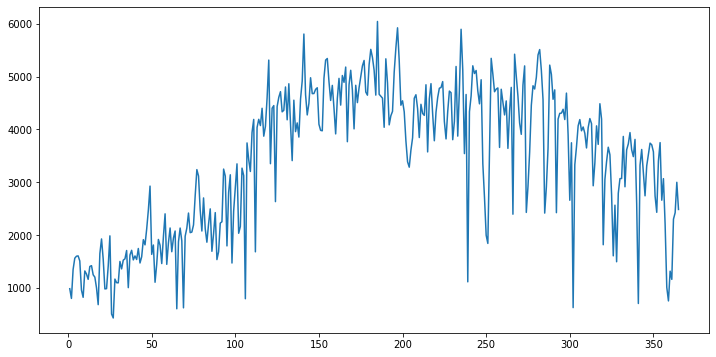

In [6]:
plt.figure(figsize=(12,6))
bikes.plt, = plt.plot(bikes.id,bikes.cnt)

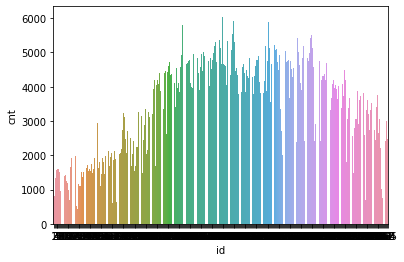

In [7]:
sns.barplot(bikes.id,bikes.cnt)

In [8]:
vacation = bikes.loc[(bikes.id>230) & (bikes.id<300)]
                     

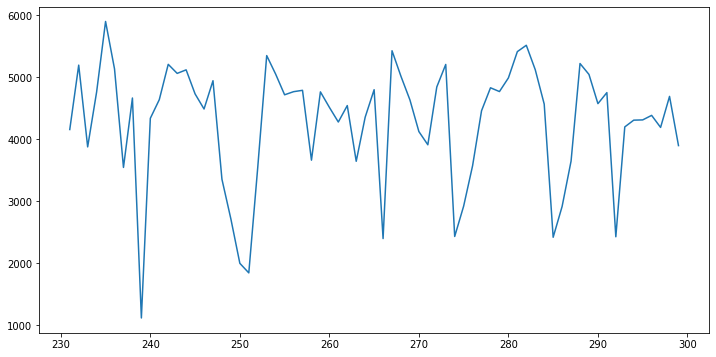

In [9]:
plt.figure(figsize=(12,6))
bikes.plt, = plt.plot(vacation.id,vacation.cnt)

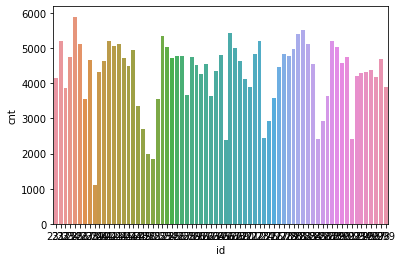

In [10]:
sns.barplot(vacation.id,vacation.cnt)

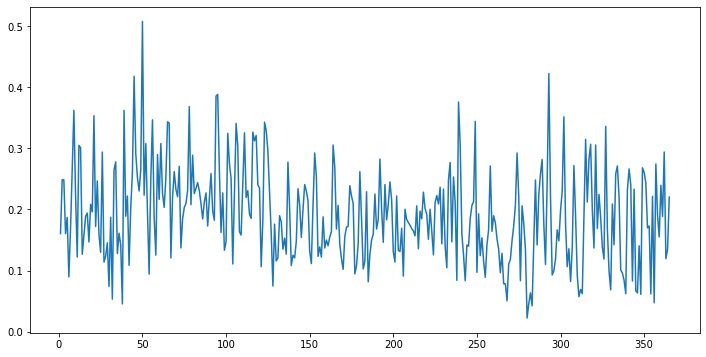

In [11]:
plt.figure(figsize=(12,6))
bikes.plt, = plt.plot(bikes.id,bikes.windspeed)

In [403]:
from pyMechkar.analysis import train_test, Table1

In [404]:
X_train, X_test = train_test(bikes.dropna(), prop=0.7, seed=43)

Begining analysis...
Factorizing... please wait
[******************************
[]
*******************************
*******************************
[]
------ Finished in 10.917814016342163econds -----
 
You got a perfectly balanced training and test datasets
 


In [405]:
print(X_train.shape)
print(X_test.shape)

(255, 31)
(110, 31)


## Baseline models

outcome: cnt

In [406]:
vn = ['temp','hum','windspeed','temp_div_season','temp_div_mnth','temp_div_weekday','temp_div_weathersit','temp_div_holiday','temp_div_workingday','hum_div_season','hum_div_mnth','hum_div_weekday','hum_div_weathersit','hum_div_holiday','hum_div_workingday','windspeed_div_season','windspeed_div_mnth','windspeed_div_weekday','windspeed_div_weathersit','windspeed_div_holiday','windspeed_div_workingday']

In [407]:
y_train = X_train['cnt']
X_train = X_train[vn]
print(X_train.shape)
print(y_train.shape)

(255, 21)
(255,)


In [408]:
y_test = X_test['cnt']
X_test = X_test[vn]
print(X_test.shape)
print(y_test.shape)

(110, 21)
(110,)


#### Linear Model

In [409]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(X_train,y_train)
pred_tr = mod1.predict(X_train)

pred_ts = mod1.predict(X_test)

In [410]:
print('r^2 score: %f' % r2_score(y_train,pred_tr))
print('MAE: %f' % mean_absolute_error(y_train,pred_tr))

print('r^2 score: %f' % r2_score(y_test,pred_ts))
print('MAE: %f' % mean_absolute_error(y_test,pred_ts))

r^2 score: 0.774566
MAE: 484.700078
r^2 score: 0.750968
MAE: 564.459030


In [411]:
res = pd.DataFrame([{'model':'Linear Regression - Baseline',
                     'Train R^2':r2_score(y_train,pred_tr),'Train MAE':mean_absolute_error(y_train,pred_tr),
                     'Test R^2':r2_score(y_test,pred_ts),'Test MAE':mean_absolute_error(y_test,pred_ts)}])
res

model  Train R^2   Train MAE  Test R^2   Test MAE
0  Linear Regression - Baseline   0.774566  484.700078  0.750968  564.45903

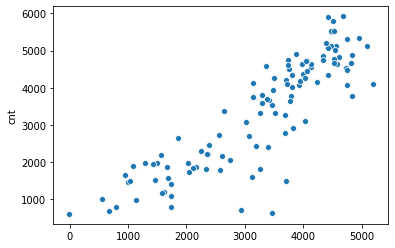

In [412]:
sns.scatterplot(pred_ts, y_test)

#### Decision Trees

In [413]:
from sklearn.tree import DecisionTreeRegressor

In [414]:
lr = DecisionTreeRegressor()
mod2 = lr.fit(X_train,y_train)
pred2_tr = mod2.predict(X_train)

pred2_ts = mod2.predict(X_test)

In [415]:
res = res.append({'model':'Decision Tree',
                  'Train R^2':r2_score(y_train,pred2_tr),'Train MAE':mean_absolute_error(y_train,pred2_tr),
                  'Test R^2':r2_score(y_test,pred2_ts),'Test MAE':mean_absolute_error(y_test,pred2_ts)
                 },ignore_index=True)
                 
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.774566  484.700078  0.750968  564.459030
1                 Decision Tree   1.000000    0.000000  0.718026  567.445455

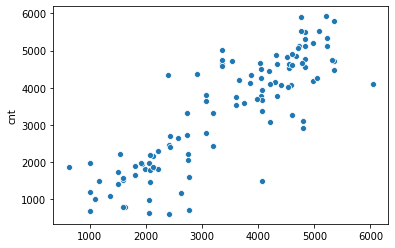

In [416]:
sns.scatterplot(pred2_ts, y_test)

#### Random Forest

In [417]:
from sklearn.ensemble import RandomForestRegressor

In [418]:
lr = RandomForestRegressor()
mod3 = lr.fit(X_train,y_train)
pred3_tr = mod3.predict(X_train)

pred3_ts = mod3.predict(X_test)

In [419]:
res = res.append({'model':'Random Forest',
                  'Train R^2':r2_score(y_train,pred3_tr),'Train MAE':mean_absolute_error(y_train,pred3_tr),
                  'Test R^2':r2_score(y_test,pred3_ts),'Test MAE':mean_absolute_error(y_test,pred3_ts)
                 },ignore_index=True)
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.774566  484.700078  0.750968  564.459030
1                 Decision Tree   1.000000    0.000000  0.718026  567.445455
2                 Random Forest   0.975766  142.788824  0.830723  435.930727

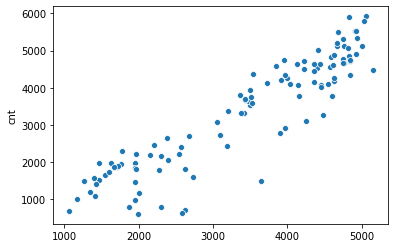

In [420]:
sns.scatterplot(pred3_ts, y_test)

#### AdaBoost

In [421]:
from sklearn.ensemble import AdaBoostRegressor

In [422]:
lr = AdaBoostRegressor()
mod4 = lr.fit(X_train,y_train)
pred4_tr = mod4.predict(X_train)

pred4_ts = mod4.predict(X_test)

In [423]:
res = res.append({'model':'AdaBoost',
                  'Train R^2':r2_score(y_train,pred4_tr),'Train MAE':mean_absolute_error(y_train,pred4_tr),
                  'Test R^2':r2_score(y_test,pred4_ts),'Test MAE':mean_absolute_error(y_test,pred4_ts)
                 },ignore_index=True)
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.774566  484.700078  0.750968  564.459030
1                 Decision Tree   1.000000    0.000000  0.718026  567.445455
2                 Random Forest   0.975766  142.788824  0.830723  435.930727
3                      AdaBoost   0.892362  360.641752  0.796564  505.505292

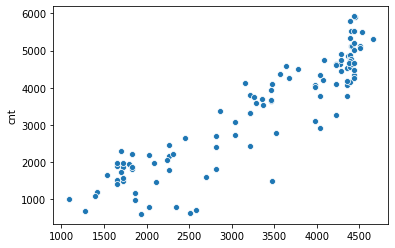

In [424]:
sns.scatterplot(pred4_ts, y_test)

#### Gradient Boosting

In [425]:
from sklearn.ensemble import GradientBoostingRegressor

In [426]:
lr = GradientBoostingRegressor()
mod5 = lr.fit(X_train,y_train)
pred5_tr = mod5.predict(X_train)

pred5_ts = mod5.predict(X_test)

In [427]:
res = res.append({'model':'Gradient Boosting Machine',
                  'Train R^2':r2_score(y_train,pred5_tr),'Train MAE':mean_absolute_error(y_train,pred5_tr),
                  'Test R^2':r2_score(y_test,pred5_ts),'Test MAE':mean_absolute_error(y_test,pred5_ts)
                 },ignore_index=True)
res

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression - Baseline   0.774566  484.700078  0.750968  564.459030
1                 Decision Tree   1.000000    0.000000  0.718026  567.445455
2                 Random Forest   0.975766  142.788824  0.830723  435.930727
3                      AdaBoost   0.892362  360.641752  0.796564  505.505292
4     Gradient Boosting Machine   0.984455  127.042388  0.847366  427.831529

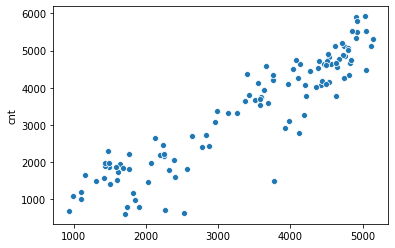

In [428]:
sns.scatterplot(pred5_ts, y_test)

#### SVM

In [429]:
from sklearn.svm import SVR

In [430]:
lr = SVR()
mod6 = lr.fit(X_train,y_train)
pred6_tr = mod6.predict(X_train)

pred6_ts = mod6.predict(X_test)

In [431]:
res = res.append({'model':'SVM',
                  'Train R^2':r2_score(y_train,pred6_tr),'Train MAE':mean_absolute_error(y_train,pred6_tr),
                  'Test R^2':r2_score(y_test,pred6_ts),'Test MAE':mean_absolute_error(y_test,pred6_ts)
                 },ignore_index=True)
res

model  Train R^2    Train MAE  Test R^2     Test MAE
0  Linear Regression - Baseline   0.774566   484.700078  0.750968   564.459030
1                 Decision Tree   1.000000     0.000000  0.718026   567.445455
2                 Random Forest   0.975766   142.788824  0.830723   435.930727
3                      AdaBoost   0.892362   360.641752  0.796564   505.505292
4     Gradient Boosting Machine   0.984455   127.042388  0.847366   427.831529
5                           SVM  -0.031388  1103.106999 -0.052865  1277.648435

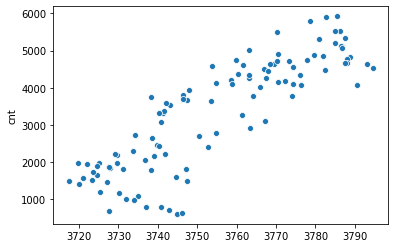

In [432]:
sns.scatterplot(pred6_ts, y_test)

#### Best Model

In [433]:
res

model  Train R^2    Train MAE  Test R^2     Test MAE
0  Linear Regression - Baseline   0.774566   484.700078  0.750968   564.459030
1                 Decision Tree   1.000000     0.000000  0.718026   567.445455
2                 Random Forest   0.975766   142.788824  0.830723   435.930727
3                      AdaBoost   0.892362   360.641752  0.796564   505.505292
4     Gradient Boosting Machine   0.984455   127.042388  0.847366   427.831529
5                           SVM  -0.031388  1103.106999 -0.052865  1277.648435

## How can we improve this model ?
 
HINT: analyzing the time series and using the knowledge we gain from this analysis to make feature engineering 

In [434]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox


In [435]:
vn2 = ['id','season','mnth','holiday','weekday','workingday','weathersit','temp','hum','windspeed','temp_div_season','temp_div_mnth','temp_div_weekday','temp_div_weathersit','temp_div_holiday','temp_div_workingday','hum_div_season','hum_div_mnth','hum_div_weekday','hum_div_weathersit','hum_div_holiday','hum_div_workingday','windspeed_div_season','windspeed_div_mnth','windspeed_div_weekday','windspeed_div_weathersit','windspeed_div_holiday','windspeed_div_workingday','cnt']

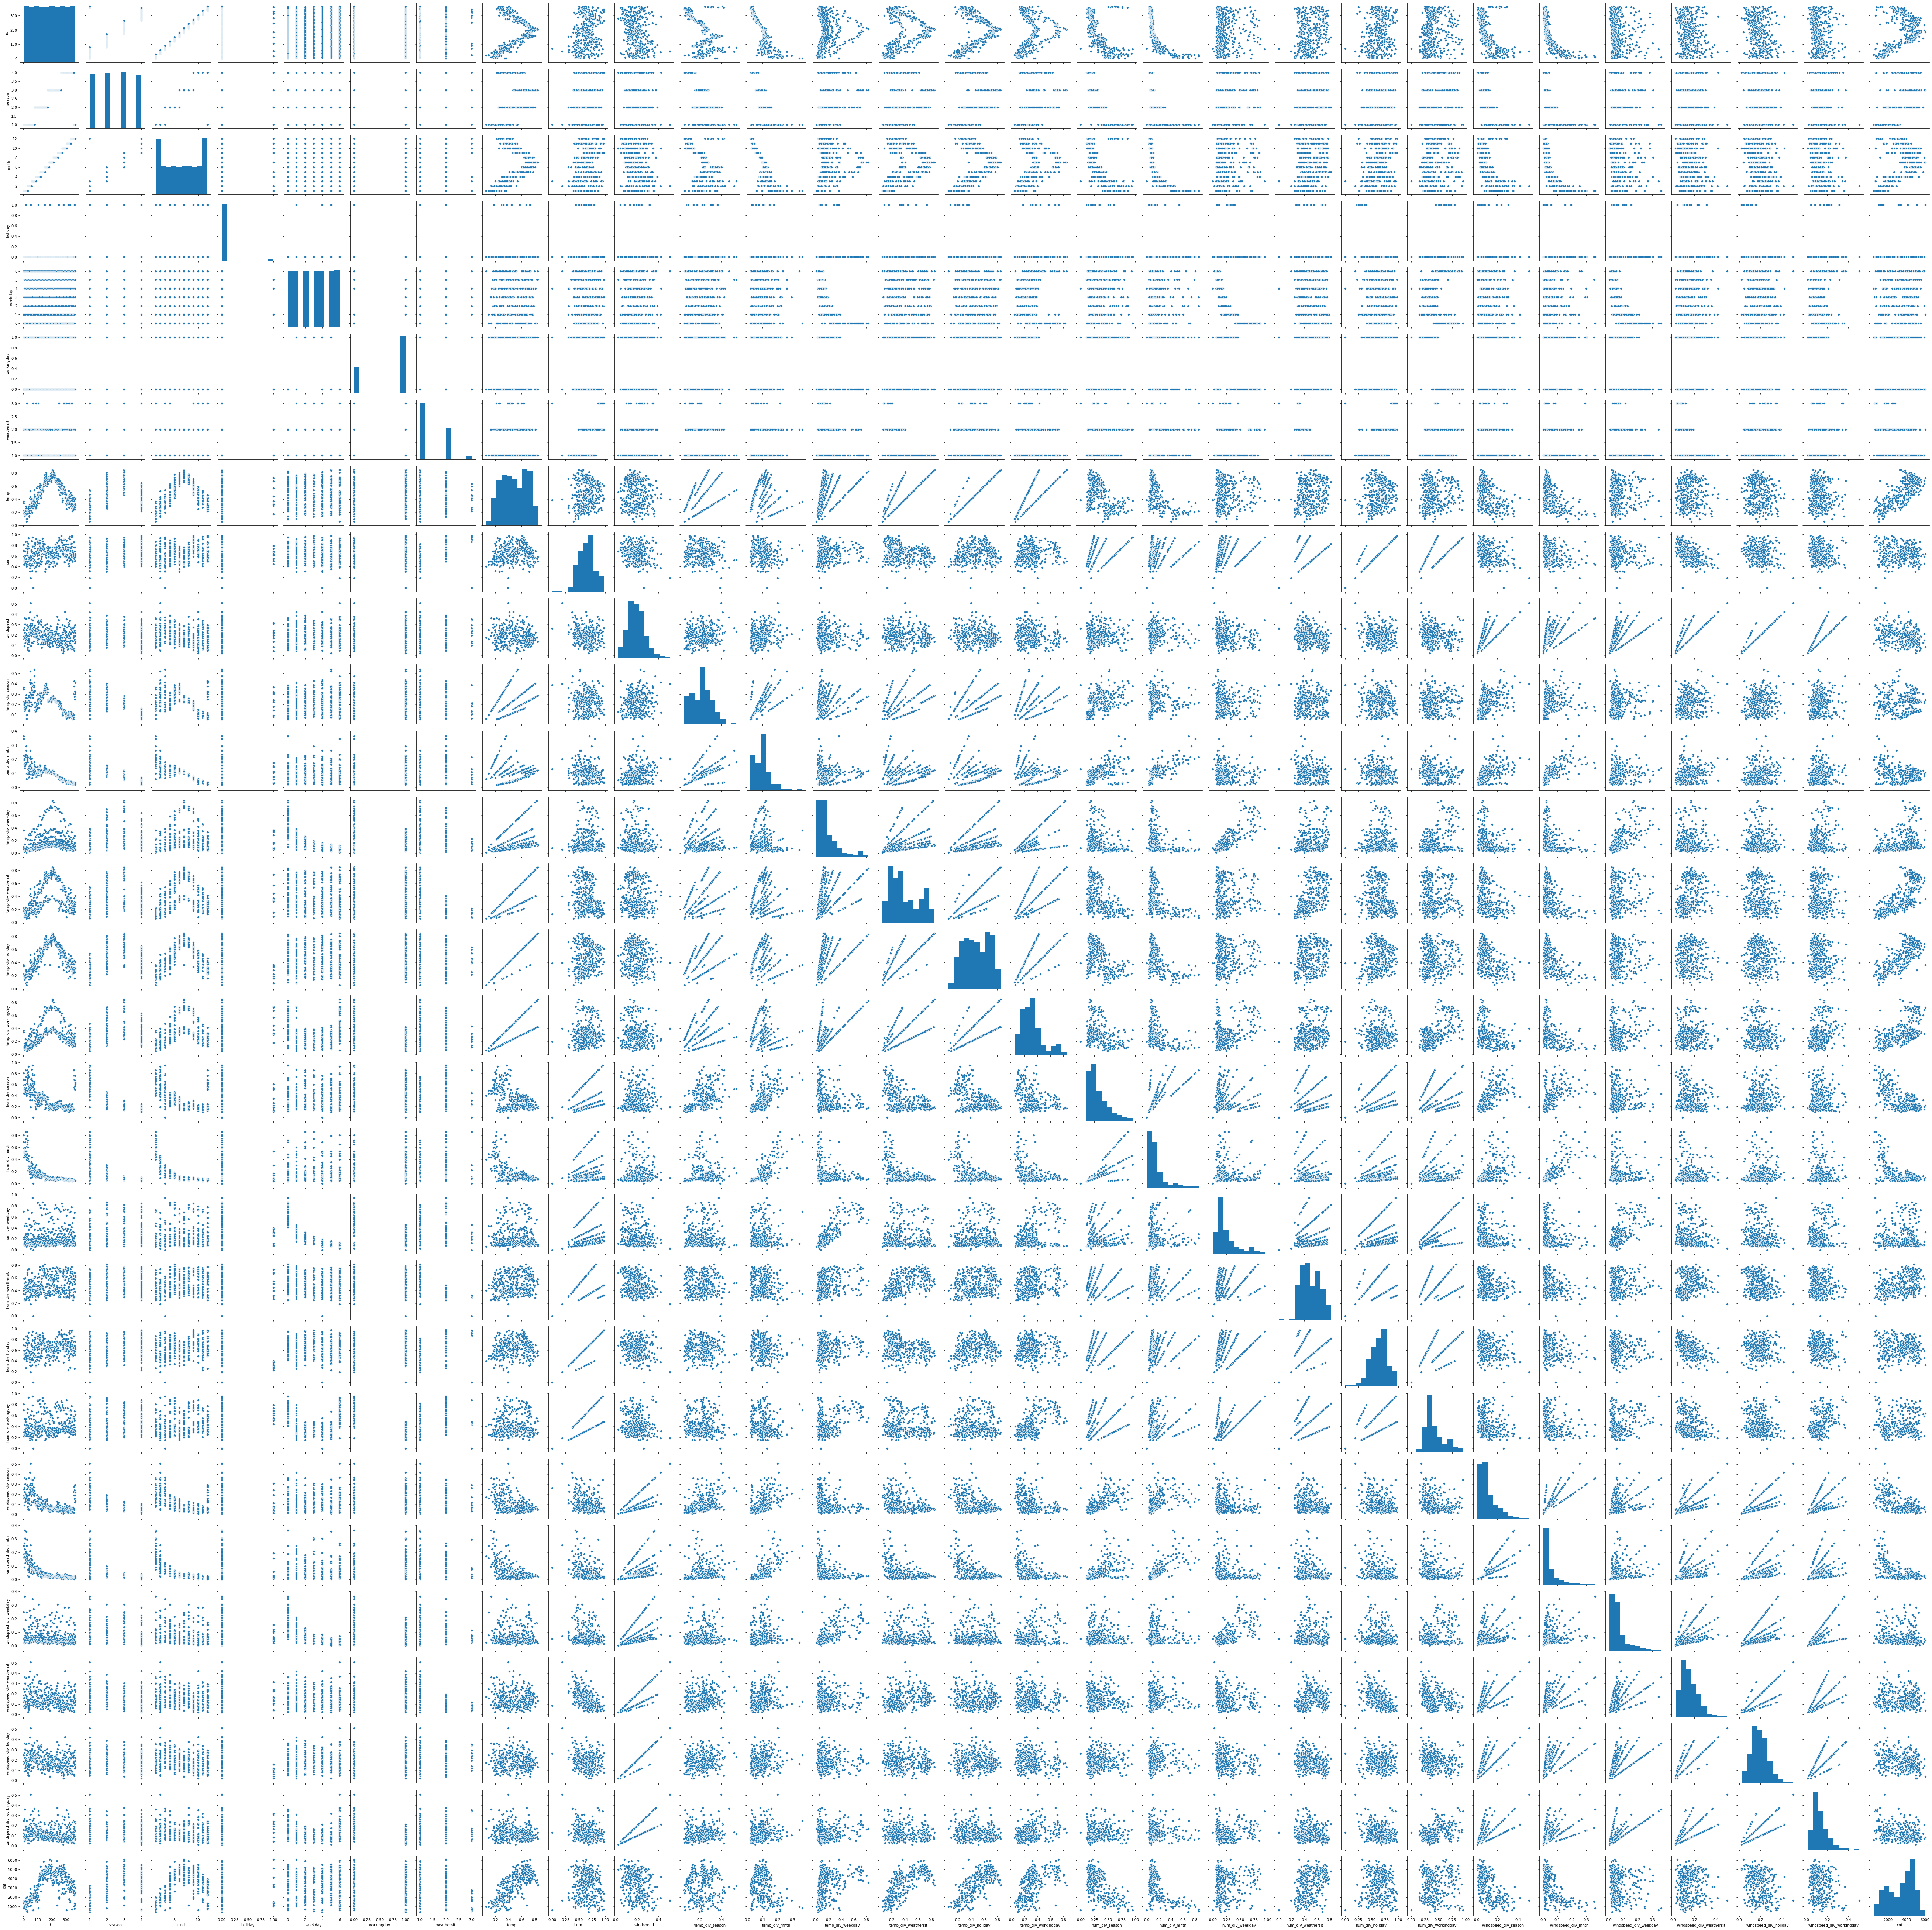

In [436]:
### plot a sample of data
sns.pairplot(bikes.loc[(bikes.id>0) & (bikes.id<366),vn2])

Missing data in TS:
    
    Forward filling
    Backward filling
    Linear interpolation
    mean/median of nearest neighbours
    


In [437]:
bikes.isna().sum()

id                          0
season                      0
mnth                        0
holiday                     0
weekday                     0
workingday                  0
weathersit                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
cnt                         0
temp_div_season             0
temp_div_mnth               0
temp_div_weekday            0
temp_div_weathersit         0
temp_div_holiday            0
temp_div_workingday         0
hum_div_season              0
hum_div_mnth                0
hum_div_weekday             0
hum_div_weathersit          0
hum_div_holiday             0
hum_div_workingday          0
windspeed_div_season        0
windspeed_div_mnth          0
windspeed_div_weekday       0
windspeed_div_weathersit    0
windspeed_div_holiday       0
windspeed_div_workingday    0
dtype: int64

In [438]:
### backward filling
bikes2 = bikes.fillna(method="bfill")
bikes2.isna().sum()

id                          0
season                      0
mnth                        0
holiday                     0
weekday                     0
workingday                  0
weathersit                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
cnt                         0
temp_div_season             0
temp_div_mnth               0
temp_div_weekday            0
temp_div_weathersit         0
temp_div_holiday            0
temp_div_workingday         0
hum_div_season              0
hum_div_mnth                0
hum_div_weekday             0
hum_div_weathersit          0
hum_div_holiday             0
hum_div_workingday          0
windspeed_div_season        0
windspeed_div_mnth          0
windspeed_div_weekday       0
windspeed_div_weathersit    0
windspeed_div_holiday       0
windspeed_div_workingday    0
dtype: int64

In [439]:
bikes2 = bikes2.fillna(method="ffill")
bikes2.isna().sum()

id                          0
season                      0
mnth                        0
holiday                     0
weekday                     0
workingday                  0
weathersit                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
cnt                         0
temp_div_season             0
temp_div_mnth               0
temp_div_weekday            0
temp_div_weathersit         0
temp_div_holiday            0
temp_div_workingday         0
hum_div_season              0
hum_div_mnth                0
hum_div_weekday             0
hum_div_weathersit          0
hum_div_holiday             0
hum_div_workingday          0
windspeed_div_season        0
windspeed_div_mnth          0
windspeed_div_weekday       0
windspeed_div_weathersit    0
windspeed_div_holiday       0
windspeed_div_workingday    0
dtype: int64

### Check for trends in the data

In [440]:
def plotTrend(data):
    ### check daily, weekly and monthly mean voltage
    fig, ax = plt.subplots(figsize = (11,4))

    ## ploting daily voltage
    daily = data.rolling(window=1, center=True).mean()
    ax.plot(daily, marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')

    ## ploting weekly voltage
    weekly = data.rolling(window=7, center=True).mean()
    ax.plot(weekly, linewidth=2, label='Weekly')

    ## ploting monthly voltage
    montly = data.rolling(window=30, center=True).mean()
    ax.plot(montly, linewidth=3, color='0.2', label='Trend (Monthly)')

    ### enhance the plot
    #ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Date')
    #ax.set_ylabel('Voltage')
    ax.set_title('Trends')

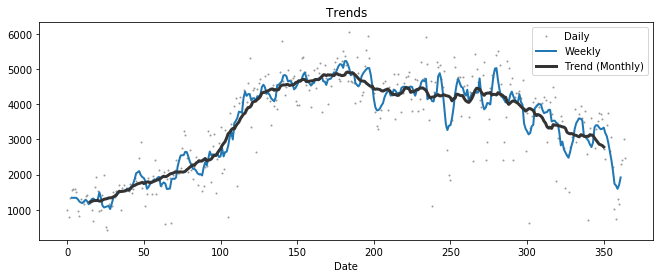

In [441]:
plotTrend(bikes2['cnt'])

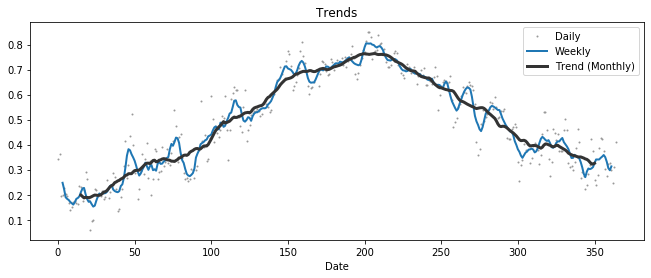

In [46]:
plotTrend(bikes2['temp'])

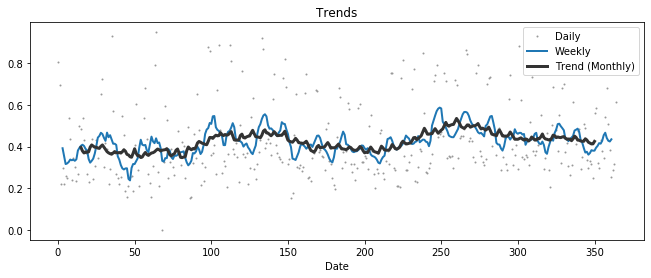

In [442]:
plotTrend(bikes2['hum_div_workingday'])

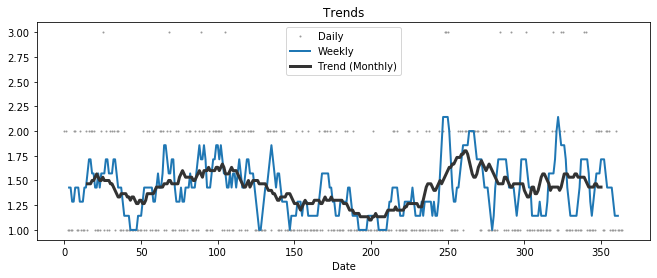

In [48]:
plotTrend(bikes2['weathersit'])

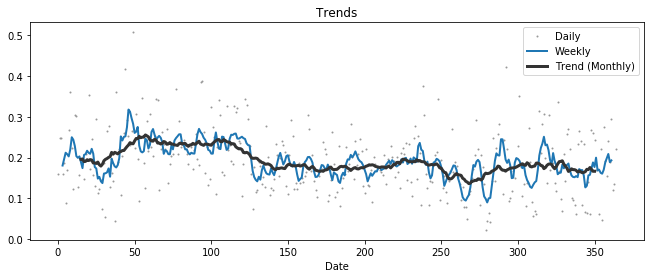

In [49]:
plotTrend(bikes2['windspeed'])

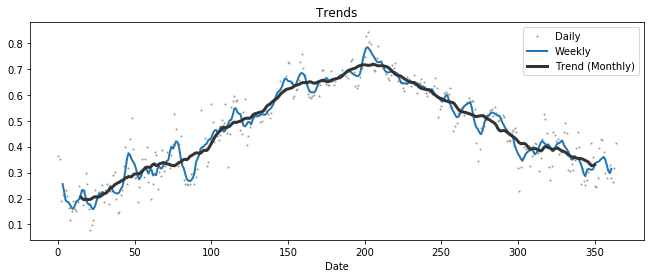

In [50]:
plotTrend(bikes2['atemp'])

### TS Differenciation

In [443]:
### differentiate the whole vector
firstorder = bikes2[vn2].diff()

In [444]:
vn2

['id',
 'season',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'temp_div_season',
 'temp_div_mnth',
 'temp_div_weekday',
 'temp_div_weathersit',
 'temp_div_holiday',
 'temp_div_workingday',
 'hum_div_season',
 'hum_div_mnth',
 'hum_div_weekday',
 'hum_div_weathersit',
 'hum_div_holiday',
 'hum_div_workingday',
 'windspeed_div_season',
 'windspeed_div_mnth',
 'windspeed_div_weekday',
 'windspeed_div_weathersit',
 'windspeed_div_holiday',
 'windspeed_div_workingday',
 'cnt']

In [445]:
firstorder.head()

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0  NaN     NaN   NaN      NaN      NaN         NaN         NaN       NaN   
1  1.0     0.0   0.0      0.0     -6.0         0.0         0.0  0.019311   
2  1.0     0.0   0.0      0.0      1.0         1.0        -1.0 -0.167114   
3  1.0     0.0   0.0      0.0      1.0         0.0         0.0  0.003636   
4  1.0     0.0   0.0      0.0      1.0         0.0         0.0  0.026957   

        hum  windspeed  ...  hum_div_weathersit  hum_div_holiday  \
0       NaN        NaN  ...                 NaN              NaN   
1 -0.109746   0.088093  ...           -0.054873        -0.109746   
2 -0.258814  -0.000230  ...            0.089229        -0.258814   
3  0.153162  -0.088013  ...            0.153162         0.153162   
4 -0.153478   0.026604  ...           -0.153478        -0.153478   

   hum_div_workingday  windspeed_div_season  windspeed_div_mnth  \
0                 NaN                   NaN                 NaN   
1           -0.109746              0.088093            0.088093   
2           -0.477450             -0.000230           -0.000230   
3            0.076581             -0.088013           -0.088013   
4           -0.076739              0.026604            0.026604   

   windspeed_div_weekday  windspeed_div_weathersit  windspeed_div_holiday  \
0                    NaN                       NaN                    NaN   
1               0.225618                  0.044046               0.088093   
2              -0.124384                  0.124040              -0.000230   
3              -0.070722                 -0.088013              -0.088013   
4              -0.006707                  0.026604               0.026604   

   windspeed_div_workingday    cnt  
0                       NaN    NaN  
1                  0.088093 -184.0  
2                 -0.124384  548.0  
3                 -0.044007  213.0  
4                  0.013302   38.0  

[5 rows x 29 columns]

In [446]:
start, end = 1, 365

In [447]:
## check if the diff data for Voltage is stationary

dftest = adfuller(firstorder.loc[start:end,'cnt'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("p.value = {:.3f}".format(dftest[1]))
print("Critical values = :")
for k,v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k,v,'not' if v< dftest[0] else '', 100-int(k[:-1])))


Test statistic = -9.867
p.value = 0.000
Critical values = :
	1%: -3.4490114443793214 - The data is  stationary with 99% confidence
	5%: -2.8697627072503757 - The data is  stationary with 95% confidence
	10%: -2.5711506161673716 - The data is  stationary with 90% confidence


In [448]:
## check if the diff data has autocorrelation
stat, pval = acorr_ljungbox(firstorder.loc[start:end,'cnt'],lags=1)
print('Ljung-Box autocorrelation - coef={}, p.val={}'.format(stat,pval))

Ljung-Box autocorrelation - coef=[41.91604865], p.val=[9.52774216e-11]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


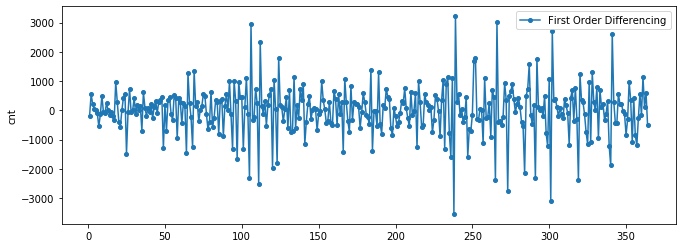

In [449]:
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(firstorder.loc[start:end, 'cnt'], marker='o', markersize=4, linestyle='-',label='First Order Differencing')
ax.set_ylabel('cnt')
ax.legend()

In [450]:
## seasonal differencing
seasondiff = firstorder.diff()

In [451]:
seasondiff

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0    NaN     NaN   NaN      NaN      NaN         NaN         NaN       NaN   
1    NaN     NaN   NaN      NaN      NaN         NaN         NaN       NaN   
2    0.0     0.0   0.0      0.0      7.0         1.0        -1.0 -0.186425   
3    0.0     0.0   0.0      0.0      0.0        -1.0         1.0  0.170750   
4    0.0     0.0   0.0      0.0      0.0         0.0         0.0  0.023321   
..   ...     ...   ...      ...      ...         ...         ...       ...   
360  0.0     0.0   0.0     -2.0      0.0         1.0         1.0 -0.043695   
361  0.0     0.0   0.0      1.0      0.0        -1.0        -2.0 -0.029131   
362  0.0     0.0   0.0      0.0      0.0         0.0         1.0 -0.024927   
363  0.0     0.0   0.0      0.0      0.0         0.0         0.0  0.114131   
364  0.0     0.0   0.0      0.0      0.0        -1.0         0.0  0.034999   

          hum  windspeed  ...  hum_div_weathersit  hum_div_holiday  \
0         NaN        NaN  ...                 NaN              NaN   
1         NaN        NaN  ...                 NaN              NaN   
2   -0.149068  -0.088323  ...            0.144102        -0.149068   
3    0.411976  -0.087783  ...            0.063933         0.411976   
4   -0.306640   0.114617  ...           -0.306640        -0.306640   
..        ...        ...  ...                 ...              ...   
360  0.429890  -0.135389  ...            0.048640         0.936847   
361 -0.514130   0.156526  ...            0.248370        -0.767608   
362  0.328841  -0.280060  ...           -0.052409         0.328841   
363 -0.007754   0.189474  ...           -0.007754        -0.007754   
364 -0.083334   0.070892  ...           -0.083334        -0.083334   

     hum_div_workingday  windspeed_div_season  windspeed_div_mnth  \
0                   NaN                   NaN                 NaN   
1                   NaN                   NaN                 NaN   
2             -0.367704             -0.088323           -0.088323   
3              0.554032             -0.087783           -0.087783   
4             -0.153320              0.114617            0.114617   
..                  ...                   ...                 ...   
360            0.048640             -0.135389           -0.011282   
361           -0.003586              0.156526            0.013044   
362            0.164420             -0.280060           -0.023338   
363           -0.003877              0.189474            0.015789   
364            0.266249              0.070892            0.005908   

     windspeed_div_weekday  windspeed_div_weathersit  windspeed_div_holiday  \
0                      NaN                       NaN                    NaN   
1                      NaN                       NaN                    NaN   
2                -0.350003                  0.079993              -0.088323   
3                 0.053662                 -0.212053              -0.087783   
4                 0.064016                  0.114617               0.114617   
..                     ...                       ...                    ...   
360              -0.021557                 -0.229614               0.104076   
361               0.067589                  0.344976               0.036794   
362              -0.060281                 -0.374285              -0.280060   
363               0.048115                  0.189474               0.189474   
364               0.010554                  0.070892               0.070892   

     windspeed_div_workingday     cnt  
0                         NaN     NaN  
1                         NaN     NaN  
2                   -0.212477   732.0  
3                    0.080378  -335.0  
4                    0.057309  -175.0  
..                        ...     ...  
360                 -0.229614  -718.0  
361                  0.197996  1295.0  
362                 -0.140030 -1019.0  
363                  0.094737   455.0  
364       

In [452]:
## check if the diff data is stationary
dftest = adfuller(seasondiff.loc[start+1:end,'cnt'], autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("p.value = {:.3f}".format(dftest[1]))
print("Critical values = :")
for k,v in dftest[4].items():
    print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k,v,'not' if v< dftest[0] else '', 100-int(k[:-1])))


Test statistic = -10.235
p.value = 0.000
Critical values = :
	1%: -3.4494474563375737 - The data is  stationary with 99% confidence
	5%: -2.8699542285903887 - The data is  stationary with 95% confidence
	10%: -2.5712527305187987 - The data is  stationary with 90% confidence


In [455]:
## check if the diff data has autocorrelation
stat, pval = acorr_ljungbox(seasondiff.loc[start+1:end,'cnt'],lags=1)
print('Ljung-Box autocorrelation - coef={}, p.val={}'.format(stat,pval))

Ljung-Box autocorrelation - coef=[125.11119775], p.val=[4.81211585e-29]


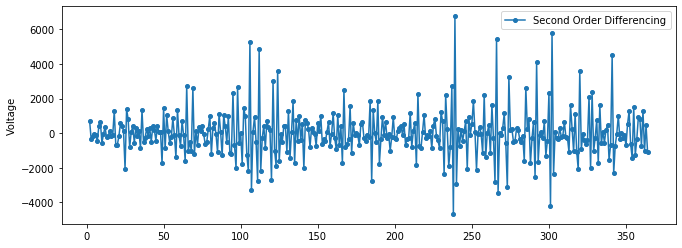

In [456]:
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(seasondiff.loc[start:end, 'cnt'], marker='o', markersize=4, linestyle='-',label='Second Order Differencing')
ax.set_ylabel('Voltage')
ax.legend()

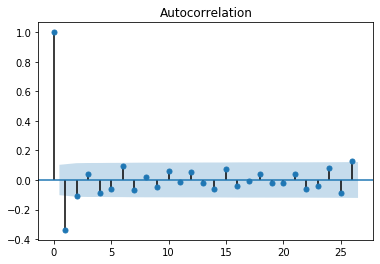

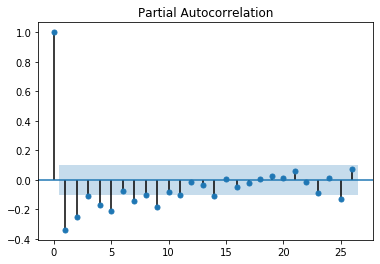

In [457]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(firstorder.loc[start:end,'cnt'])
pacf = plot_pacf(firstorder.loc[start:end,'cnt'])

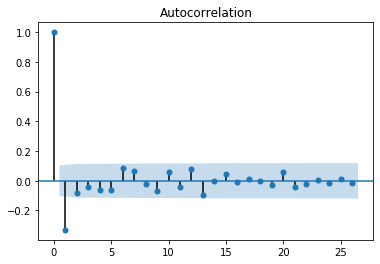

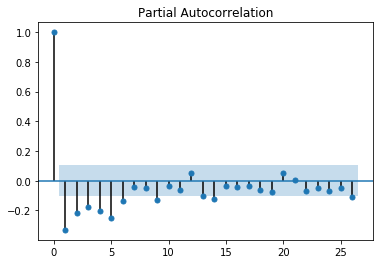

In [459]:
acf = plot_acf(firstorder.loc[start:end,'hum_div_holiday'])
pacf = plot_pacf(firstorder.loc[start:end,'hum_div_holiday'])

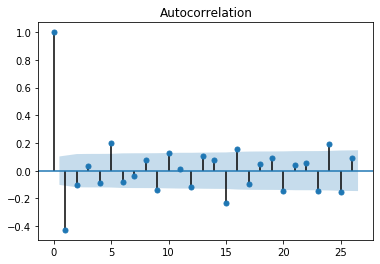

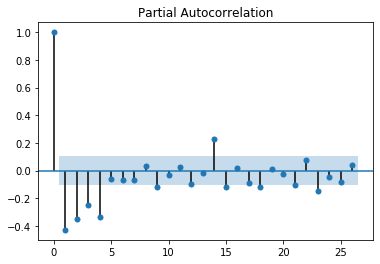

In [460]:
acf = plot_acf(firstorder.loc[start:end,'windspeed_div_mnth'])
pacf = plot_pacf(firstorder.loc[start:end,'windspeed_div_mnth'])

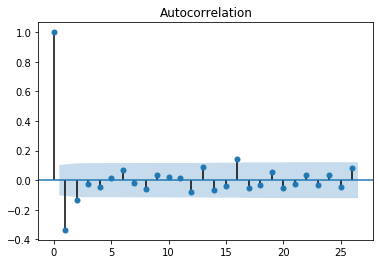

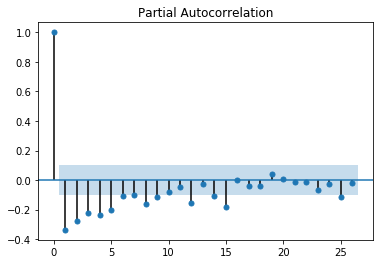

In [71]:
acf = plot_acf(firstorder.loc[start:end,'windspeed'])
pacf = plot_pacf(firstorder.loc[start:end,'windspeed'])

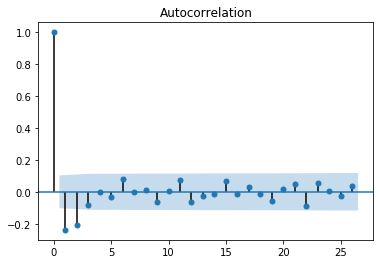

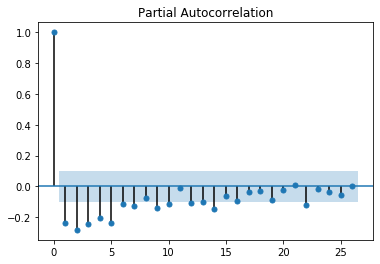

In [72]:
acf = plot_acf(firstorder.loc[start:end,'weathersit'])
pacf = plot_pacf(firstorder.loc[start:end,'weathersit'])

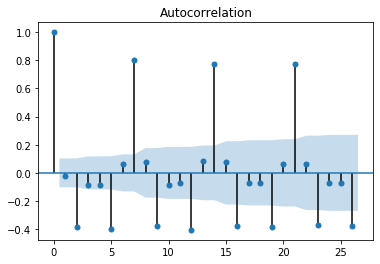

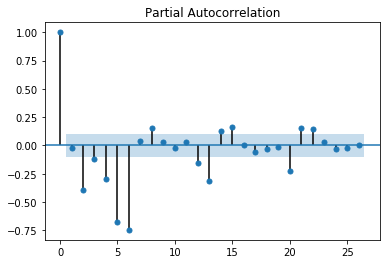

In [73]:
acf = plot_acf(firstorder.loc[start:end,'workingday'])
pacf = plot_pacf(firstorder.loc[start:end,'workingday'])

### TS Decomposition

In [461]:
from datetime import datetime
from datetime import timedelta
bikes2.date = datetime(2018, 1, 1, 0, 0)

In [462]:
for index, row in bikes2.iterrows():
    bikes2.loc[index,'date']  = datetime(2018, 1, 1, 0, 0) + timedelta(days=row.id-1) 
bikes2

id  season  mnth  holiday  weekday  workingday  weathersit      temp  \
0      1       1     1        0        6           0           2  0.344167   
1      2       1     1        0        0           0           2  0.363478   
2      3       1     1        0        1           1           1  0.196364   
3      4       1     1        0        2           1           1  0.200000   
4      5       1     1        0        3           1           1  0.226957   
..   ...     ...   ...      ...      ...         ...         ...       ...   
360  361       1    12        0        2           1           2  0.325000   
361  362       1    12        0        3           1           1  0.299130   
362  363       1    12        0        4           1           1  0.248333   
363  364       1    12        0        5           1           1  0.311667   
364  365       1    12        0        6           0           1  0.410000   

        atemp       hum  ...  hum_div_weathersit  hum_div_holiday  \
0    0.363625  0.805833  ...            0.402917         0.805833   
1    0.353739  0.696087  ...            0.348044         0.696087   
2    0.189405  0.437273  ...            0.437273         0.437273   
3    0.212122  0.590435  ...            0.590435         0.590435   
4    0.229270  0.436957  ...            0.436957         0.436957   
..        ...       ...  ...                 ...              ...   
360  0.327633  0.762500  ...            0.381250         0.762500   
361  0.279974  0.503913  ...            0.503913         0.503913   
362  0.263892  0.574167  ...            0.574167         0.574167   
363  0.318812  0.636667  ...            0.636667         0.636667   
364  0.414121  0.615833  ...            0.615833         0.615833   

     hum_div_workingday  windspeed_div_season  windspeed_div_mnth  \
0              0.805833              0.160446            0.160446   
1              0.696087              0.248539            0.248539   
2              0.218636              0.248309            0.248309   
3              0.295218              0.160296            0.160296   
4              0.218478              0.186900            0.186900   
..                  ...                   ...                 ...   
360            0.381250              0.188450            0.015704   
361            0.251957              0.293961            0.024497   
362            0.287083              0.119412            0.009951   
363            0.318333              0.134337            0.011195   
364            0.615833              0.220154            0.018346   

     windspeed_div_weekday  windspeed_div_weathersit  windspeed_div_holiday  \
0                 0.022921                  0.080223               0.160446   
1                 0.248539                  0.124269               0.248539   
2                 0.124155                  0.248309               0.248309   
3                 0.053432                  0.160296               0.160296   
4                 0.046725                  0.186900               0.186900   
..                     ...                       ...                    ...   
360               0.062817                  0.094225               0.188450   
361               0.073490                  0.293961               0.293961   
362               0.023882                  0.119412               0.119412   
363               0.022389                  0.134337               0.134337   
364               0.031451                  0.220154               0.220154   

     windspeed_div_workingday       date  
0                    0.160446 2018-01-01  
1                    0.248539 2018-01-02  
2                    0.124155 2018-01-03  
3                    0.080148 2018-01-04  
4                    0.093450 2018-01-05  
..                        ...        ...  
360                  0.094225 2018-12-27  
361                  0.146981 2018-12-28  
362                  0.059706 2018-12-29  
363                  0.067168 20

In [463]:
bikes2.set_index('date',inplace=True)
bikes2


id  season  mnth  holiday  weekday  workingday  weathersit  \
date                                                                      
2018-01-01    1       1     1        0        6           0           2   
2018-01-02    2       1     1        0        0           0           2   
2018-01-03    3       1     1        0        1           1           1   
2018-01-04    4       1     1        0        2           1           1   
2018-01-05    5       1     1        0        3           1           1   
...         ...     ...   ...      ...      ...         ...         ...   
2018-12-27  361       1    12        0        2           1           2   
2018-12-28  362       1    12        0        3           1           1   
2018-12-29  363       1    12        0        4           1           1   
2018-12-30  364       1    12        0        5           1           1   
2018-12-31  365       1    12        0        6           0           1   

                temp     atemp       hum  ...  hum_div_weekday  \
date                                      ...                    
2018-01-01  0.344167  0.363625  0.805833  ...         0.115119   
2018-01-02  0.363478  0.353739  0.696087  ...         0.696087   
2018-01-03  0.196364  0.189405  0.437273  ...         0.218636   
2018-01-04  0.200000  0.212122  0.590435  ...         0.196812   
2018-01-05  0.226957  0.229270  0.436957  ...         0.109239   
...              ...       ...       ...  ...              ...   
2018-12-27  0.325000  0.327633  0.762500  ...         0.254167   
2018-12-28  0.299130  0.279974  0.503913  ...         0.125978   
2018-12-29  0.248333  0.263892  0.574167  ...         0.114833   
2018-12-30  0.311667  0.318812  0.636667  ...         0.106111   
2018-12-31  0.410000  0.414121  0.615833  ...         0.087976   

            hum_div_weathersit  hum_div_holiday  hum_div_workingday  \
date                                                                  
2018-01-01            0.402917         0.805833            0.805833   
2018-01-02            0.348044         0.696087            0.696087   
2018-01-03            0.437273         0.437273            0.218636   
2018-01-04            0.590435         0.590435            0.295218   
2018-01-05            0.436957         0.436957            0.218478   
...                        ...              ...                 ...   
2018-12-27            0.381250         0.762500            0.381250   
2018-12-28            0.503913         0.503913            0.251957   
2018-12-29            0.574167         0.574167            0.287083   
2018-12-30            0.636667         0.636667            0.318333   
2018-12-31            0.615833         0.615833            0.615833   

            windspeed_div_season  windspeed_div_mnth  windspeed_div_weekday  \
date                                                                          
2018-01-01              0.160446            0.160446               0.022921   
2018-01-02              0.248539            0.248539               0.248539   
2018-01-03              0.248309            0.248309               0.124155   
2018-01-04              0.160296            0.160296               0.053432   
2018-01-05              0.186900            0.186900               0.046725   
...                          ...                 ...                    ...   
2018-12-27              0.188450            0.015704               0.062817   
2018-12-28              0.293961            0.024497               0.073490   
2018-12-29              0.119412            0.009951               0.023882   
2018-12-30              0.134337            0.011195               0.022389   
2018-12-31              0.220154            0.018346               0.031451   

            windspeed_div_weathersit  windspeed_div_holiday  \
date                                                          
2018-01-01                  0.080223               0.160446   
2018-01-02                  0.124269 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


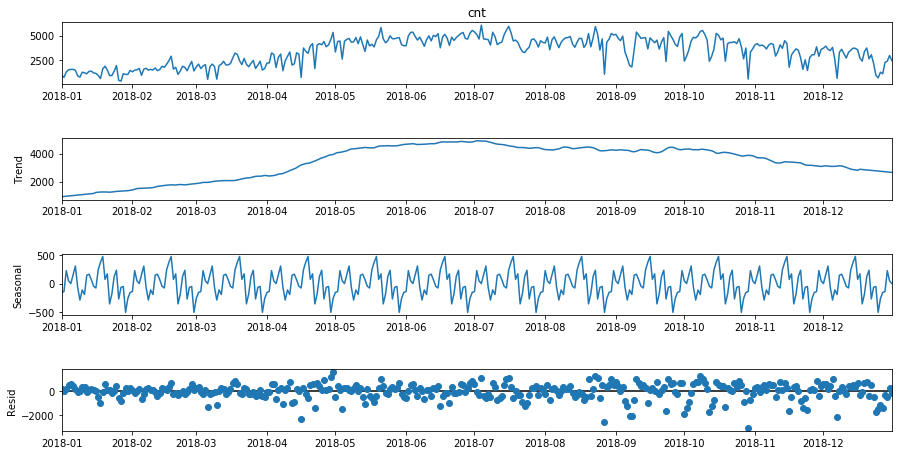

In [464]:
dec = seasonal_decompose(x=bikes2['cnt'], model='additive', extrapolate_trend='freq',period=30)
fig = dec.plot()
fig.set_size_inches(14,7)
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


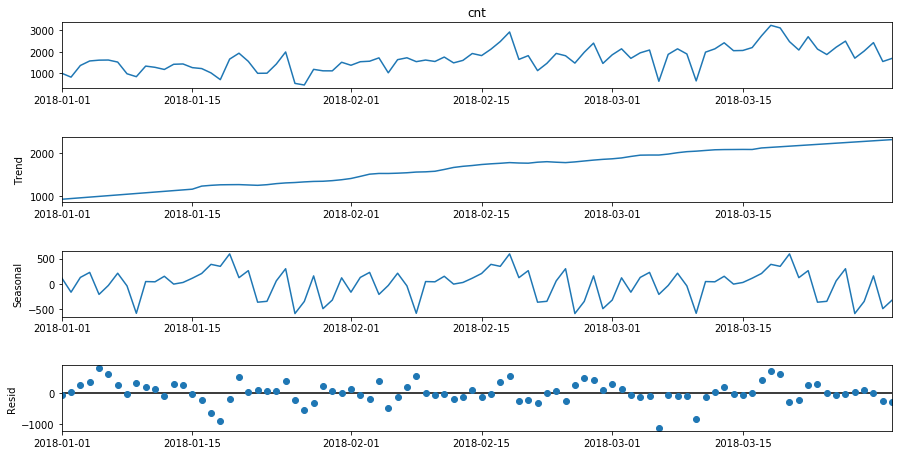

In [362]:
start, end = "2018-01-01","2018-03-31"
dec = seasonal_decompose(x=bikes2.loc[start:end,'cnt'], model='additive', extrapolate_trend='freq',period=30)
fig = dec.plot()
fig.set_size_inches(14,7)
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


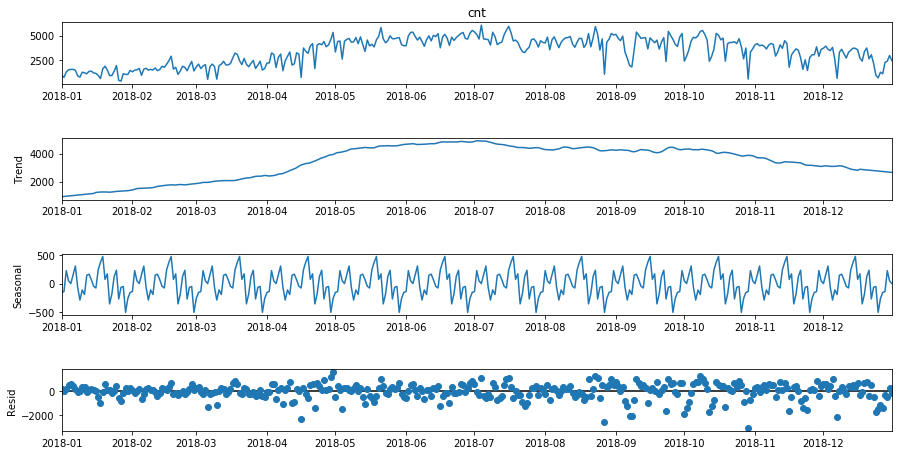

In [363]:
start, end = "2018-01-01","2018-12-31"
dec = seasonal_decompose(x=bikes2.loc[start:end,'cnt'], model='additive', extrapolate_trend='freq',period=30)
fig = dec.plot()
fig.set_size_inches(14,7)
fig.show()

In [465]:
print(dec.seasonal[start:end])

date
2018-01-02   -139.766280
2018-01-03    224.087059
2018-01-04     45.766038
2018-01-05     -0.828059
2018-01-06    148.713819
                 ...    
2018-12-27   -155.685003
2018-12-28   -139.766280
2018-12-29    224.087059
2018-12-30     45.766038
2018-12-31     -0.828059
Name: seasonal, Length: 364, dtype: float64


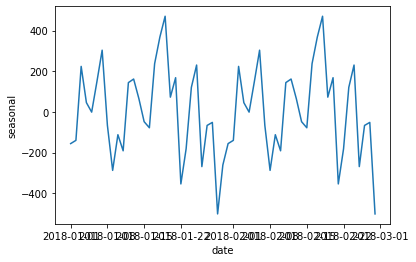

In [365]:
sns.lineplot(x=dec.seasonal[0:59].index,y=dec.seasonal[0:59])

In [466]:
dec = seasonal_decompose(x=bikes2['cnt'], model='additive', extrapolate_trend='freq',period=30)

In [467]:
seasonality = dec.seasonal
len(seasonality)

365

### Run a Vector Autoregression Model (VAR)

In [468]:
cor_res = []
pd.DataFrame(columns=['var1','var2','lag','correlation','p_value'])
# correlation between voltage and lagged 
for lag in range(1,60):
    cnt = bikes2['cnt'].iloc[lag:]
    temp = bikes2['temp'].iloc[: -lag]
    hum = bikes2['hum'].iloc[: -lag]
    windspeed = bikes2['windspeed'].iloc[: -lag]
    temp_div_season = bikes2['temp_div_season'].iloc[: -lag]
    hum_div_season = bikes2['hum_div_season'].iloc[: -lag]
    windspeed_div_season = bikes2['windspeed_div_season'].iloc[: -lag]
    temp_div_mnth = bikes2['temp_div_mnth'].iloc[: -lag]
    hum_div_mnth = bikes2['hum_div_mnth'].iloc[: -lag]
    windspeed_div_mnth = bikes2['windspeed_div_mnth'].iloc[: -lag]
    temp_div_weekday = bikes2['temp_div_weekday'].iloc[: -lag]
    hum_div_weekday = bikes2['hum_div_weekday'].iloc[: -lag]
    windspeed_div_weekday = bikes2['windspeed_div_weekday'].iloc[: -lag]
    temp_div_weathersit = bikes2['temp_div_weathersit'].iloc[: -lag]
    hum_div_weathersit = bikes2['hum_div_weathersit'].iloc[: -lag]
    windspeed_div_weathersit = bikes2['windspeed_div_weathersit'].iloc[: -lag]
    temp_div_holiday = bikes2['temp_div_holiday'].iloc[: -lag]
    hum_div_holiday = bikes2['hum_div_holiday'].iloc[: -lag]
    windspeed_div_holiday = bikes2['windspeed_div_holiday'].iloc[: -lag]
    temp_div_workingday = bikes2['temp_div_workingday'].iloc[: -lag]
    hum_div_workingday = bikes2['hum_div_workingday'].iloc[: -lag]
    windspeed_div_workingday = bikes2['windspeed_div_workingday'].iloc[: -lag]
    
    
    cor, p_value = pearsonr(cnt,temp)
    cor_res.append(['cnt','temp',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum)
    cor_res.append(['cnt','hum',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed)
    cor_res.append(['cnt','windspeed',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,temp_div_season)
    cor_res.append(['cnt','temp_div_season',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,temp_div_weekday)
    cor_res.append(['cnt','temp_div_mnth',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,temp_div_weekday)
    cor_res.append(['cnt','temp_div_weekday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,temp_div_weathersit)
    cor_res.append(['cnt','temp_div_weathersit',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,temp_div_holiday)
    cor_res.append(['cnt','temp_div_holiday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,temp_div_workingday)
    cor_res.append(['cnt','temp_div_workingday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum_div_season)
    cor_res.append(['cnt','hum_div_season',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum_div_mnth)
    cor_res.append(['cnt','hum_div_mnth',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum_div_weekday)
    cor_res.append(['cnt','hum_div_weekday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum_div_weathersit)
    cor_res.append(['cnt','hum_div_weathersit',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum_div_holiday)
    cor_res.append(['cnt','hum_div_holiday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,hum_div_workingday)
    cor_res.append(['cnt','hum_div_workingday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed_div_season)
    cor_res.append(['cnt','windspeed_div_season',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed_div_mnth)
    cor_res.append(['cnt','windspeed_div_mnth',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed_div_weekday)
    cor_res.append(['cnt','windspeed_div_weekday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed_div_weathersit)
    cor_res.append(['cnt','windspeed_div_weathersit',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed_div_holiday)
    cor_res.append(['cnt','windspeed_div_holiday',lag,cor,p_value])
    cor, p_value = pearsonr(cnt,windspeed_div_workingday)
    cor_res.append(['cnt','windspeed_div_workingday',lag,cor,p_value])

cor_res = pd.DataFrame(cor_res, columns=['var1','var2','lag','correlation','p_value'])

In [469]:
cor_res

var1                      var2  lag  correlation       p_value
0     cnt                      temp    1     0.734762  5.439899e-63
1     cnt                       hum    1     0.107142  4.105379e-02
2     cnt                 windspeed    1    -0.206829  7.022097e-05
3     cnt           temp_div_season    1     0.010497  8.418084e-01
4     cnt             temp_div_mnth    1     0.323258  2.674931e-10
...   ...                       ...  ...          ...           ...
1234  cnt        windspeed_div_mnth   59    -0.356975  1.258489e-10
1235  cnt     windspeed_div_weekday   59    -0.047735  4.053642e-01
1236  cnt  windspeed_div_weathersit   59     0.072256  2.075112e-01
1237  cnt     windspeed_div_holiday   59     0.067752  2.373332e-01
1238  cnt  windspeed_div_workingday   59     0.020793  7.171485e-01

[1239 rows x 5 columns]

In [470]:
cor_res.loc[cor_res.p_value<0.05]

var1                  var2  lag  correlation       p_value
0     cnt                  temp    1     0.734762  5.439899e-63
1     cnt                   hum    1     0.107142  4.105379e-02
2     cnt             windspeed    1    -0.206829  7.022097e-05
4     cnt         temp_div_mnth    1     0.323258  2.674931e-10
5     cnt      temp_div_weekday    1     0.323258  2.674931e-10
...   ...                   ...  ...          ...           ...
1226  cnt   temp_div_workingday   59     0.286038  3.582981e-07
1227  cnt        hum_div_season   59    -0.232626  3.971123e-05
1228  cnt          hum_div_mnth   59    -0.419367  1.830736e-14
1233  cnt  windspeed_div_season   59    -0.152078  7.700934e-03
1234  cnt    windspeed_div_mnth   59    -0.356975  1.258489e-10

[864 rows x 5 columns]

In [471]:
cor_res.loc[cor_res.p_value>=0.05]

var1                      var2  lag  correlation   p_value
3     cnt           temp_div_season    1     0.010497  0.841808
11    cnt           hum_div_weekday    1     0.056877  0.279121
14    cnt        hum_div_workingday    1     0.058969  0.261795
17    cnt     windspeed_div_weekday    1    -0.092554  0.077810
18    cnt  windspeed_div_weathersit    1    -0.055479  0.291131
...   ...                       ...  ...          ...       ...
1232  cnt        hum_div_workingday   59    -0.040644  0.478723
1235  cnt     windspeed_div_weekday   59    -0.047735  0.405364
1236  cnt  windspeed_div_weathersit   59     0.072256  0.207511
1237  cnt     windspeed_div_holiday   59     0.067752  0.237333
1238  cnt  windspeed_div_workingday   59     0.020793  0.717148

[375 rows x 5 columns]

In [472]:
cor_res.loc[cor_res.lag==1]

var1                      var2  lag  correlation       p_value
0   cnt                      temp    1     0.734762  5.439899e-63
1   cnt                       hum    1     0.107142  4.105379e-02
2   cnt                 windspeed    1    -0.206829  7.022097e-05
3   cnt           temp_div_season    1     0.010497  8.418084e-01
4   cnt             temp_div_mnth    1     0.323258  2.674931e-10
5   cnt          temp_div_weekday    1     0.323258  2.674931e-10
6   cnt       temp_div_weathersit    1     0.638513  4.421873e-43
7   cnt          temp_div_holiday    1     0.732481  2.026039e-62
8   cnt       temp_div_workingday    1     0.528716  1.328525e-27
9   cnt            hum_div_season    1    -0.604987  1.036334e-37
10  cnt              hum_div_mnth    1    -0.600166  5.444465e-37
11  cnt           hum_div_weekday    1     0.056877  2.791206e-01
12  cnt        hum_div_weathersit    1     0.316548  6.485383e-10
13  cnt           hum_div_holiday    1     0.127104  1.524539e-02
14  cnt        hum_div_workingday    1     0.058969  2.617955e-01
15  cnt      windspeed_div_season    1    -0.585796  6.498265e-35
16  cnt        windspeed_div_mnth    1    -0.602812  2.198501e-37
17  cnt     windspeed_div_weekday    1    -0.092554  7.780965e-02
18  cnt  windspeed_div_weathersit    1    -0.055479  2.911309e-01
19  cnt     windspeed_div_holiday    1    -0.178219  6.357471e-04
20  cnt  windspeed_div_workingday    1    -0.177419  6.730989e-04

In [473]:
cor_res.loc[cor_res.lag==2]

var1                      var2  lag  correlation       p_value
21  cnt                      temp    2     0.731021  6.847880e-62
22  cnt                       hum    2     0.170276  1.126707e-03
23  cnt                 windspeed    2    -0.158834  2.404983e-03
24  cnt           temp_div_season    2     0.015550  7.677983e-01
25  cnt             temp_div_mnth    2     0.310680  1.455941e-09
26  cnt          temp_div_weekday    2     0.310680  1.455941e-09
27  cnt       temp_div_weathersit    2     0.578948  7.176445e-34
28  cnt          temp_div_holiday    2     0.727637  4.615351e-61
29  cnt       temp_div_workingday    2     0.529520  1.264496e-27
30  cnt            hum_div_season    2    -0.572138  6.024185e-33
31  cnt              hum_div_mnth    2    -0.576915  1.361540e-33
32  cnt           hum_div_weekday    2     0.045854  3.837141e-01
33  cnt        hum_div_weathersit    2     0.232945  7.300282e-06
34  cnt           hum_div_holiday    2     0.179452  5.922192e-04
35  cnt        hum_div_workingday    2     0.099158  5.911398e-02
36  cnt      windspeed_div_season    2    -0.556180  7.290085e-31
37  cnt        windspeed_div_mnth    2    -0.584393  1.262958e-34
38  cnt     windspeed_div_weekday    2    -0.083402  1.126685e-01
39  cnt  windspeed_div_weathersit    2    -0.094468  7.222898e-02
40  cnt     windspeed_div_holiday    2    -0.142747  6.443998e-03
41  cnt  windspeed_div_workingday    2    -0.129060  1.386485e-02

In [474]:
cor_res.loc[cor_res.lag==3]

var1                      var2  lag  correlation       p_value
42  cnt                      temp    3     0.740809  3.464523e-64
43  cnt                       hum    3     0.169455  1.210525e-03
44  cnt                 windspeed    3    -0.167851  1.349219e-03
45  cnt           temp_div_season    3     0.031062  5.557997e-01
46  cnt             temp_div_mnth    3     0.270169  1.789918e-07
47  cnt          temp_div_weekday    3     0.270169  1.789918e-07
48  cnt       temp_div_weathersit    3     0.587733  5.298561e-35
49  cnt          temp_div_holiday    3     0.731831  6.348275e-62
50  cnt       temp_div_workingday    3     0.512289  1.300701e-25
51  cnt            hum_div_season    3    -0.575508  2.590116e-33
52  cnt              hum_div_mnth    3    -0.582859  2.547968e-34
53  cnt           hum_div_weekday    3     0.001386  9.790401e-01
54  cnt        hum_div_weathersit    3     0.229841  9.999666e-06
55  cnt           hum_div_holiday    3     0.171427  1.058068e-03
56  cnt        hum_div_workingday    3     0.060205  2.532204e-01
57  cnt      windspeed_div_season    3    -0.565170  6.129364e-32
58  cnt        windspeed_div_mnth    3    -0.592944  9.596375e-36
59  cnt     windspeed_div_weekday    3    -0.128139  1.470144e-02
60  cnt  windspeed_div_weathersit    3    -0.103789  4.847006e-02
61  cnt     windspeed_div_holiday    3    -0.155844  2.948394e-03
62  cnt  windspeed_div_workingday    3    -0.148400  4.663310e-03

In [475]:
cor_res.loc[cor_res.lag==6]

var1                      var2  lag  correlation       p_value
105  cnt                      temp    6     0.743180  2.828761e-64
106  cnt                       hum    6     0.202075  1.156026e-04
107  cnt                 windspeed    6    -0.152859  3.693278e-03
108  cnt           temp_div_season    6     0.077119  1.447659e-01
109  cnt             temp_div_mnth    6     0.335847  6.494237e-11
110  cnt          temp_div_weekday    6     0.335847  6.494237e-11
111  cnt       temp_div_weathersit    6     0.569952  2.603066e-32
112  cnt          temp_div_holiday    6     0.715351  1.570102e-57
113  cnt       temp_div_workingday    6     0.567359  5.692377e-32
114  cnt            hum_div_season    6    -0.523424  1.211646e-26
115  cnt              hum_div_mnth    6    -0.579183  1.516998e-33
116  cnt           hum_div_weekday    6     0.066323  2.099710e-01
117  cnt        hum_div_weathersit    6     0.231187  9.635797e-06
118  cnt           hum_div_holiday    6     0.173214  9.827012e-04
119  cnt        hum_div_workingday    6     0.141025  7.448254e-03
120  cnt      windspeed_div_season    6    -0.540683  1.211512e-28
121  cnt        windspeed_div_mnth    6    -0.602372  7.947660e-37
122  cnt     windspeed_div_weekday    6    -0.062574  2.369537e-01
123  cnt  windspeed_div_weathersit    6    -0.102306  5.277529e-02
124  cnt     windspeed_div_holiday    6    -0.151682  3.968847e-03
125  cnt  windspeed_div_workingday    6    -0.105569  4.562420e-02

#### Var fitting

In [479]:
varmod = VAR(bikes2[['cnt','temp','hum','windspeed','temp_div_season','temp_div_mnth','temp_div_weekday','temp_div_weathersit','temp_div_holiday','temp_div_workingday','hum_div_season','hum_div_mnth','hum_div_weekday','hum_div_weathersit','hum_div_holiday','hum_div_workingday','windspeed_div_season','windspeed_div_mnth','windspeed_div_weekday','windspeed_div_weathersit','windspeed_div_holiday','windspeed_div_workingday']])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [490]:
mxlgs = 15

varfit = varmod.fit(maxlags=mxlgs)

In [491]:
varfit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 06, Nov, 2020
Time:                     16:12:32
--------------------------------------------------------------------
No. of Equations:         22.0000    BIC:                   -202.868
Nobs:                     350.000    HQIC:                  -251.186
Log likelihood:           45904.7    FPE:               1.44944e-107
AIC:                     -283.135    Det(Omega_mle):    2.96606e-114
--------------------------------------------------------------------
Results for equation cnt
                                  coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------
const                              -25.439318      3028.436049           -0.008           0.993
L1.cnt                               0.305107         0.277220            1.101           0.271
L1

In [492]:
finalvar = varfit.summary()

In [493]:
pval = np.concatenate(finalvar.model.pvalues[0:mxlgs]).tolist()
len(pval)

330

In [494]:
len(finalvar.model.exog_names)

331

In [495]:
finalvar.model.exog_names[1:len(finalvar.model.exog_names)]

['L1.cnt',
 'L1.temp',
 'L1.hum',
 'L1.windspeed',
 'L1.temp_div_season',
 'L1.temp_div_mnth',
 'L1.temp_div_weekday',
 'L1.temp_div_weathersit',
 'L1.temp_div_holiday',
 'L1.temp_div_workingday',
 'L1.hum_div_season',
 'L1.hum_div_mnth',
 'L1.hum_div_weekday',
 'L1.hum_div_weathersit',
 'L1.hum_div_holiday',
 'L1.hum_div_workingday',
 'L1.windspeed_div_season',
 'L1.windspeed_div_mnth',
 'L1.windspeed_div_weekday',
 'L1.windspeed_div_weathersit',
 'L1.windspeed_div_holiday',
 'L1.windspeed_div_workingday',
 'L2.cnt',
 'L2.temp',
 'L2.hum',
 'L2.windspeed',
 'L2.temp_div_season',
 'L2.temp_div_mnth',
 'L2.temp_div_weekday',
 'L2.temp_div_weathersit',
 'L2.temp_div_holiday',
 'L2.temp_div_workingday',
 'L2.hum_div_season',
 'L2.hum_div_mnth',
 'L2.hum_div_weekday',
 'L2.hum_div_weathersit',
 'L2.hum_div_holiday',
 'L2.hum_div_workingday',
 'L2.windspeed_div_season',
 'L2.windspeed_div_mnth',
 'L2.windspeed_div_weekday',
 'L2.windspeed_div_weathersit',
 'L2.windspeed_div_holiday',
 'L2.w

In [496]:
ttest = np.concatenate(finalvar.model.tvalues_endog_lagged[0:mxlgs]).tolist()
len(ttest)


330

In [497]:
voltvar = pd.DataFrame({'vars':finalvar.model.exog_names[1:len(finalvar.model.exog_names)],'ttest':ttest,'pval':pval})
voltvar


vars     ttest      pval
0                          L1.cnt  1.100594  0.993298
1                         L1.temp -0.307449  0.314812
2                          L1.hum -0.482029  0.325090
3                    L1.windspeed -0.388292  0.311054
4              L1.temp_div_season  0.216475  0.620485
..                            ...       ...       ...
325        L15.windspeed_div_mnth -2.991352  0.888195
326     L15.windspeed_div_weekday -1.873075  0.027954
327  L15.windspeed_div_weathersit -0.691786  0.014946
328     L15.windspeed_div_holiday -1.485766  0.204526
329  L15.windspeed_div_workingday -0.594992  0.625989

[330 rows x 3 columns]

In [498]:
voltvar[voltvar.pval<0.05]

vars     ttest          pval
11                L1.hum_div_mnth -0.999577  2.309936e-02
12             L1.hum_div_weekday  1.013366  1.750049e-02
13          L1.hum_div_weathersit  1.227433  4.046813e-02
46                         L3.hum  2.101015  4.760986e-02
47                   L3.windspeed  1.052654  4.452438e-03
50            L3.temp_div_weekday -2.180200  1.642572e-03
51         L3.temp_div_weathersit -1.698254  4.297318e-03
57          L3.hum_div_weathersit -0.488598  2.167934e-02
58             L3.hum_div_holiday  2.164186  2.385892e-02
60        L3.windspeed_div_season  1.172648  3.361884e-03
61          L3.windspeed_div_mnth  2.441972  9.150075e-05
62       L3.windspeed_div_weekday  1.681085  9.900356e-05
64       L3.windspeed_div_holiday  1.239573  1.677934e-03
68                         L4.hum  0.435197  3.563966e-02
72            L4.temp_div_weekday -0.326353  2.924263e-02
80             L4.hum_div_holiday  0.898827  3.045004e-02
83          L4.windspeed_div_mnth  1.680873  1.460729e-02
108      L5.windspeed_div_holiday -0.380125  3.326334e-02
122            L6.hum_div_weekday  2.021762  7.655070e-03
144            L7.hum_div_weekday -1.066571  4.320090e-02
148       L7.windspeed_div_season -0.813109  4.687547e-02
149         L7.windspeed_div_mnth -1.165947  2.356167e-03
151   L7.windspeed_div_weathersit -0.232581  3.051226e-02
181              L9.temp_div_mnth -0.148812  2.200818e-02
200                       L10.hum  1.053481  1.457856e-02
201                 L10.windspeed  1.273087  1.853211e-03
204          L10.temp_div_weekday  5.499793  1.974743e-02
205       L10.temp_div_weathersit -1.669873  6.502590e-03
212           L10.hum_div_holiday  1.431314  9.183429e-03
214      L10.windspeed_div_season  1.294768  1.141415e-03
215        L10.windspeed_div_mnth  1.388341  1.243369e-05
216     L10.windspeed_div_weekday  2.436316  2.567177e-05
218     L10.windspeed_div_holiday  1.588499  5.469571e-04
219  L10.windspeed_div_workingday  0.835945  3.601255e-02
226          L11.temp_div_weekday -0.078802  3.802371e-08
238     L11.windspeed_div_weekday -0.041793  1.483771e-02
265                      L13.temp -0.379526  4.119392e-03
268           L13.temp_div_season  0.016905  4.005127e-02
269             L13.temp_div_mnth -0.458331  7.012443e-03
273       L13.temp_div_workingday -2.173078  3.312778e-03
275              L13.hum_div_mnth  1.072927  4.526340e-02
276           L13.hum_div_weekday -0.243194  2.825022e-03
280      L13.windspeed_div_season -0.036176  4.203782e-02
283  L13.windspeed_div_weathersit -0.957733  1.024043e-02
286                       L14.cnt  0.172454  2.891373e-03
295       L14.temp_div_workingday  1.026545  2.977442e-02
300           L14.hum_div_holiday  0.471468  2.862452e-02
313             L15.temp_div_mnth  0.533558  2.751237e-02
319              L15.hum_div_mnth -2.349071  4.045365e-02
326     L15.windspeed_div_weekday -1.873075  2.795368e-02
327  L15.windspeed_div_weathersit -0.691786  1.494576e-02

In [499]:
voltvar[voltvar.pval>=0.05]

vars     ttest      pval
0                          L1.cnt  1.100594  0.993298
1                         L1.temp -0.307449  0.314812
2                          L1.hum -0.482029  0.325090
3                    L1.windspeed -0.388292  0.311054
4              L1.temp_div_season  0.216475  0.620485
..                            ...       ...       ...
323        L15.hum_div_workingday -0.768493  0.279943
324      L15.windspeed_div_season -1.358000  0.171267
325        L15.windspeed_div_mnth -2.991352  0.888195
328     L15.windspeed_div_holiday -1.485766  0.204526
329  L15.windspeed_div_workingday -0.594992  0.625989

[279 rows x 3 columns]

In [500]:
voltvar.loc[0:15,:]

vars     ttest      pval
0                   L1.cnt  1.100594  0.993298
1                  L1.temp -0.307449  0.314812
2                   L1.hum -0.482029  0.325090
3             L1.windspeed -0.388292  0.311054
4       L1.temp_div_season  0.216475  0.620485
5         L1.temp_div_mnth -0.570711  0.734643
6      L1.temp_div_weekday  0.085648  0.172775
7   L1.temp_div_weathersit  1.271142  0.488342
8      L1.temp_div_holiday -0.622912  0.996294
9   L1.temp_div_workingday  0.694870  0.118023
10       L1.hum_div_season -0.621142  0.429318
11         L1.hum_div_mnth -0.999577  0.023099
12      L1.hum_div_weekday  1.013366  0.017500
13   L1.hum_div_weathersit  1.227433  0.040468
14      L1.hum_div_holiday -0.630334  0.174153
15   L1.hum_div_workingday -0.127264  0.789491

In [504]:
voltvar[abs(voltvar.ttest)>=1]

vars     ttest      pval
0                       L1.cnt  1.100594  0.993298
7       L1.temp_div_weathersit  1.271142  0.488342
12          L1.hum_div_weekday  1.013366  0.017500
13       L1.hum_div_weathersit  1.227433  0.040468
24                      L2.hum -1.980834  0.629785
..                         ...       ...       ...
322        L15.hum_div_holiday -2.371972  0.637307
324   L15.windspeed_div_season -1.358000  0.171267
325     L15.windspeed_div_mnth -2.991352  0.888195
326  L15.windspeed_div_weekday -1.873075  0.027954
328  L15.windspeed_div_holiday -1.485766  0.204526

[150 rows x 3 columns]

In [505]:
voltvar[(voltvar.ttest>=2) & (voltvar.pval<=0.05)]

vars     ttest      pval
46                      L3.hum  2.101015  0.047610
58          L3.hum_div_holiday  2.164186  0.023859
61       L3.windspeed_div_mnth  2.441972  0.000092
122         L6.hum_div_weekday  2.021762  0.007655
204       L10.temp_div_weekday  5.499793  0.019747
216  L10.windspeed_div_weekday  2.436316  0.000026

The following lags seems to be potentially useful for adding to the dataset:

    Lags for Voltage: 1, 7, 11, 24, 26, 36
    Lags for Global_active_bikes: 2, 5, 8, 9, 12
    Lags for Global_reactive_bikes: 3, 4 ,13, 28, 30
    Lags for Sub_metering2: 2, 4, 14, 19, 49
    Lags for Sub_metering3: 2, 3, 5, 9, 15, 17, 30, 33, 40, 55



### Adding new variables and testing their effect on models

In [506]:
bikes2['seasonality'] = seasonality.tolist()

In [507]:
seasonality.describe()

count    365.000000
mean      -0.072401
std      221.403951
min     -501.617527
25%     -155.685003
50%       -0.828059
75%      161.923419
max      470.806078
Name: seasonal, dtype: float64

In [508]:
len(seasonality)

365

In [509]:
seasonality.head()

date
2018-01-01   -155.685003
2018-01-02   -139.766280
2018-01-03    224.087059
2018-01-04     45.766038
2018-01-05     -0.828059
Name: seasonal, dtype: float64

In [510]:
bikes2['seasonality'].head()

date
2018-01-01   -155.685003
2018-01-02   -139.766280
2018-01-03    224.087059
2018-01-04     45.766038
2018-01-05     -0.828059
Name: seasonality, dtype: float64

In [512]:

bikes2['hum_lag3'] = bikes2.hum.shift(3)
bikes2['hum_div_holiday_lag3'] = bikes2.hum_div_holiday.shift(3)
bikes2['windspeed_div_mnth_lag3'] = bikes2.windspeed_div_mnth.shift(3)
bikes2['hum_div_weekday_lag6'] = bikes2.hum_div_weekday.shift(6)
bikes2['temp_div_weekday_lag10'] = bikes2.temp_div_weekday.shift(10)
bikes2['windspeed_div_weekday_lag10'] = bikes2.windspeed_div_weekday.shift(10)
bikes2.head()

id  season  mnth  holiday  weekday  workingday  weathersit  \
date                                                                     
2018-01-01   1       1     1        0        6           0           2   
2018-01-02   2       1     1        0        0           0           2   
2018-01-03   3       1     1        0        1           1           1   
2018-01-04   4       1     1        0        2           1           1   
2018-01-05   5       1     1        0        3           1           1   

                temp     atemp       hum  ...  windspeed_div_weathersit  \
date                                      ...                             
2018-01-01  0.344167  0.363625  0.805833  ...                  0.080223   
2018-01-02  0.363478  0.353739  0.696087  ...                  0.124269   
2018-01-03  0.196364  0.189405  0.437273  ...                  0.248309   
2018-01-04  0.200000  0.212122  0.590435  ...                  0.160296   
2018-01-05  0.226957  0.229270  0.436957  ...                  0.186900   

            windspeed_div_holiday  windspeed_div_workingday  seasonality  \
date                                                                       
2018-01-01               0.160446                  0.160446  -155.685003   
2018-01-02               0.248539                  0.248539  -139.766280   
2018-01-03               0.248309                  0.124155   224.087059   
2018-01-04               0.160296                  0.080148    45.766038   
2018-01-05               0.186900                  0.093450    -0.828059   

            hum_lag3  hum_div_holiday_lag3  windspeed_div_mnth_lag3  \
date                                                                  
2018-01-01       NaN                   NaN                      NaN   
2018-01-02       NaN                   NaN                      NaN   
2018-01-03       NaN                   NaN                      NaN   
2018-01-04  0.805833              0.805833                 0.160446   
2018-01-05  0.696087              0.696087                 0.248539   

            hum_div_weekday_lag6  temp_div_weekday_lag10  \
date                                                       
2018-01-01                   NaN                     NaN   
2018-01-02                   NaN                     NaN   
2018-01-03                   NaN                     NaN   
2018-01-04                   NaN                     NaN   
2018-01-05                   NaN                     NaN   

            windspeed_div_weekday_lag10  
date                                     
2018-01-01                          NaN  
2018-01-02                          NaN  
2018-01-03                          NaN  
2018-01-04                          NaN  
2018-01-05                          NaN  

[5 rows x 37 columns]

In [254]:
bikes2['Global_active_bikes_lag2'] = bikes2.Global_active_bikes.shift(2)
bikes2['Global_active_bikes_lag5'] = bikes2.Global_active_bikes.shift(5)
bikes2['Global_active_bikes_lag8'] = bikes2.Global_active_bikes.shift(8)
bikes2['Global_active_bikes_lag12'] = bikes2.Global_active_bikes.shift(12)
bikes2.head()

Date            Time  Global_active_bikes  Global_reactive_bikes  \
0 2006-12-16 0 days 17:24:00                4.216                  0.418   
1 2006-12-16 0 days 17:25:00                5.360                  0.436   
2 2006-12-16 0 days 17:26:00                5.374                  0.498   
3 2006-12-16 0 days 17:27:00                5.388                  0.502   
4 2006-12-16 0 days 17:28:00                3.666                  0.528   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   234.84              18.4             0.0             1.0            17.0   
1   233.63              23.0             0.0             1.0            16.0   
2   233.29              23.0             0.0             2.0            17.0   
3   233.74              23.0             0.0             1.0            17.0   
4   235.68              15.8             0.0             1.0            17.0   

   seasonality  voltage_lag1  voltage_lag7  voltage_lag24  voltage_lag36  \
0          NaN           NaN           NaN            NaN            NaN   
1          NaN        234.84           NaN            NaN            NaN   
2          NaN        233.63           NaN            NaN            NaN   
3          NaN        233.29           NaN            NaN            NaN   
4          NaN        233.74           NaN            NaN            NaN   

   Global_active_bikes_lag2  Global_active_bikes_lag5  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                     4.216                       NaN   
3                     5.360                       NaN   
4                     5.374                       NaN   

   Global_active_bikes_lag8  Global_active_bikes_lag12  
0                       NaN                        NaN  
1                       NaN                        NaN  
2                       NaN                        NaN  
3                       NaN                        NaN  
4                       NaN                        NaN

In [255]:
# 3, 4 ,13, 28, 30
bikes2['Global_reactive_bikes_lag3'] = bikes2.Global_reactive_bikes.shift(3)
bikes2['Global_reactive_bikes_lag4'] = bikes2.Global_reactive_bikes.shift(4)
bikes2['Global_reactive_bikes_lag13'] = bikes2.Global_reactive_bikes.shift(13)
bikes2['Global_reactive_bikes_lag30'] = bikes2.Global_reactive_bikes.shift(30)
bikes2.head()

Date            Time  Global_active_bikes  Global_reactive_bikes  \
0 2006-12-16 0 days 17:24:00                4.216                  0.418   
1 2006-12-16 0 days 17:25:00                5.360                  0.436   
2 2006-12-16 0 days 17:26:00                5.374                  0.498   
3 2006-12-16 0 days 17:27:00                5.388                  0.502   
4 2006-12-16 0 days 17:28:00                3.666                  0.528   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   234.84              18.4             0.0             1.0            17.0   
1   233.63              23.0             0.0             1.0            16.0   
2   233.29              23.0             0.0             2.0            17.0   
3   233.74              23.0             0.0             1.0            17.0   
4   235.68              15.8             0.0             1.0            17.0   

   seasonality  ...  voltage_lag24  voltage_lag36  Global_active_bikes_lag2  \
0          NaN  ...            NaN            NaN                       NaN   
1          NaN  ...            NaN            NaN                       NaN   
2          NaN  ...            NaN            NaN                     4.216   
3          NaN  ...            NaN            NaN                     5.360   
4          NaN  ...            NaN            NaN                     5.374   

   Global_active_bikes_lag5  Global_active_bikes_lag8  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   Global_active_bikes_lag12  Global_reactive_bikes_lag3  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                       0.418   
4                        NaN                       0.436   

   Global_reactive_bikes_lag4  Global_reactive_bikes_lag13  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                         NaN                          NaN   
4                       0.418                          NaN   

   Global_reactive_bikes_lag30  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 22 columns]

In [256]:
# 2, 4, 14, 19, 49
bikes2['Sub_metering_2_lag2'] = bikes2.Sub_metering_2.shift(2)
bikes2['Sub_metering_2_lag4'] = bikes2.Sub_metering_2.shift(4)
bikes2['Sub_metering_2_lag14'] = bikes2.Sub_metering_2.shift(14)
bikes2['Sub_metering_2_lag19'] = bikes2.Sub_metering_2.shift(19)
bikes2['Sub_metering_2_lag49'] = bikes2.Sub_metering_2.shift(49)
bikes2.head()

Date            Time  Global_active_bikes  Global_reactive_bikes  \
0 2006-12-16 0 days 17:24:00                4.216                  0.418   
1 2006-12-16 0 days 17:25:00                5.360                  0.436   
2 2006-12-16 0 days 17:26:00                5.374                  0.498   
3 2006-12-16 0 days 17:27:00                5.388                  0.502   
4 2006-12-16 0 days 17:28:00                3.666                  0.528   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   234.84              18.4             0.0             1.0            17.0   
1   233.63              23.0             0.0             1.0            16.0   
2   233.29              23.0             0.0             2.0            17.0   
3   233.74              23.0             0.0             1.0            17.0   
4   235.68              15.8             0.0             1.0            17.0   

   seasonality  ...  Global_active_bikes_lag12  Global_reactive_bikes_lag3  \
0          NaN  ...                        NaN                         NaN   
1          NaN  ...                        NaN                         NaN   
2          NaN  ...                        NaN                         NaN   
3          NaN  ...                        NaN                       0.418   
4          NaN  ...                        NaN                       0.436   

   Global_reactive_bikes_lag4  Global_reactive_bikes_lag13  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                         NaN                          NaN   
4                       0.418                          NaN   

   Global_reactive_bikes_lag30  Sub_metering_2_lag2  Sub_metering_2_lag4  \
0                          NaN                  NaN                  NaN   
1                          NaN                  NaN                  NaN   
2                          NaN                  1.0                  NaN   
3                          NaN                  1.0                  NaN   
4                          NaN                  2.0                  1.0   

   Sub_metering_2_lag14  Sub_metering_2_lag19  Sub_metering_2_lag49  
0                   NaN                   NaN                   NaN  
1                   NaN                   NaN                   NaN  
2                   NaN                   NaN                   NaN  
3                   NaN                   NaN                   NaN  
4                   NaN                   NaN                   NaN  

[5 rows x 27 columns]

In [513]:
bikes2.describe()

id      season        mnth     holiday     weekday  workingday  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean   183.000000    2.498630    6.526027    0.027397    3.008219    0.684932   
std    105.510663    1.110946    3.452584    0.163462    2.006155    0.465181   
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     92.000000    2.000000    4.000000    0.000000    1.000000    0.000000   
50%    183.000000    3.000000    7.000000    0.000000    3.000000    1.000000   
75%    274.000000    3.000000   10.000000    0.000000    5.000000    1.000000   
max    365.000000    4.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum  ...  \
count  365.000000  365.000000  365.000000  365.000000  ...   
mean     1.421918    0.486665    0.466835    0.643665  ...   
std      0.571831    0.189596    0.168836    0.148744  ...   
min      1.000000    0.059130    0.079070    0.000000  ...   
25%      1.000000    0.325000    0.321954    0.538333  ...   
50%      1.000000    0.479167    0.472846    0.647500  ...   
75%      2.000000    0.656667    0.612379    0.742083  ...   
max      3.000000    0.849167    0.840896    0.972500  ...   

       windspeed_div_weathersit  windspeed_div_holiday  \
count                365.000000             365.000000   
mean                   0.151809               0.188776   
std                    0.078482               0.077518   
min                    0.022392               0.021152   
25%                    0.094420               0.134337   
50%                    0.135573               0.184696   
75%                    0.200258               0.233221   
max                    0.507463               0.507463   

       windspeed_div_workingday  seasonality    hum_lag3  \
count                365.000000   365.000000  362.000000   
mean                   0.125641    -0.072401    0.643953   
std                    0.069857   221.403951    0.149308   
min                    0.011196  -501.617527    0.000000   
25%                    0.074321  -155.685003    0.538021   
50%                    0.110700    -0.828059    0.648741   
75%                    0.160446   161.923419    0.742803   
max                    0.507463   470.806078    0.972500   

       hum_div_holiday_lag3  windspeed_div_mnth_lag3  hum_div_weekday_lag6  \
count            362.000000               362.000000            359.000000   
mean               0.635440                 0.052342              0.240628   
std                0.158450                 0.059262              0.194346   
min                0.000000                 0.002239              0.000000   
25%                0.524741                 0.018346              0.107679   
50%                0.642917                 0.027718              0.165937   
75%                0.741997                 0.065791              0.294757   
max                0.972500                 0.361950              0.948261   

       temp_div_weekday_lag10  windspeed_div_weekday_lag10  
count              355.000000                   355.000000  
mean                 0.182828                     0.069760  
std                  0.163075                     0.061983  
min                  0.008447                     0.003732  
25%                  0.076909                     0.031955  
50%                  0.125667                     0.046850  
75%                  0.225347                     0.078567  
max                  0.830000                     0.361950  

[8 rows x 37 columns]

## Follow-up models


In [514]:
bikes2.columns

Index(['id', 'season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'temp_div_season', 'temp_div_mnth', 'temp_div_weekday',
       'temp_div_weathersit', 'temp_div_holiday', 'temp_div_workingday',
       'hum_div_season', 'hum_div_mnth', 'hum_div_weekday',
       'hum_div_weathersit', 'hum_div_holiday', 'hum_div_workingday',
       'windspeed_div_season', 'windspeed_div_mnth', 'windspeed_div_weekday',
       'windspeed_div_weathersit', 'windspeed_div_holiday',
       'windspeed_div_workingday', 'seasonality', 'hum_lag3',
       'hum_div_holiday_lag3', 'windspeed_div_mnth_lag3',
       'hum_div_weekday_lag6', 'temp_div_weekday_lag10',
       'windspeed_div_weekday_lag10'],
      dtype='object')

In [271]:
vn = ['season', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'temp_div_season', 'temp_div_mnth', 'temp_div_weekday',
       'temp_div_weathersit', 'temp_div_holiday', 'temp_div_workingday',
       'hum_div_season', 'hum_div_mnth', 'hum_div_weekday',
       'hum_div_weathersit', 'hum_div_holiday', 'hum_div_workingday',
       'windspeed_div_season', 'windspeed_div_mnth', 'windspeed_div_weekday',
       'windspeed_div_weathersit', 'windspeed_div_holiday',
       'windspeed_div_workingday', 'seasonality', 'hum_lag3',
       'hum_div_holiday_lag3', 'windspeed_div_mnth_lag3',
       'hum_div_weekday_lag6', 'temp_div_weekday_lag10',
       'windspeed_div_weekday_lag10']

In [517]:
from pyMechkar.analysis import train_test, Table1
X_train, X_test = train_test(bikes2.dropna(), prop=0.7, seed=21)

Begining analysis...
Factorizing... please wait
*************************************
[]
[**************************************
[**************************************
[]
------ Finished in 13.187689304351807econds -----
 
You got a perfectly balanced training and test datasets
 


In [519]:
y_train = X_train['cnt']
X_train = X_train[vn]
print(X_train.shape)
print(y_train.shape)

(248, 21)
(248,)


In [521]:
y_test = X_test['cnt']
X_test = X_test[vn]
print(X_test.shape)
print(y_test.shape)

(107, 21)
(107,)


#### Linear Model

In [522]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
mod1 = lr.fit(X_train,y_train)
pred_tr = mod1.predict(X_train)

pred_ts = mod1.predict(X_test)

In [523]:
print('r^2 score: %f' % r2_score(y_train,pred_tr))
print('MAE: %f' % mean_absolute_error(y_train,pred_tr))

print('r^2 score: %f' % r2_score(y_test,pred_ts))
print('MAE: %f' % mean_absolute_error(y_test,pred_ts))

r^2 score: 0.771323
MAE: 497.363018
r^2 score: 0.717643
MAE: 564.265949


In [524]:
res2 = pd.DataFrame([{'model':'Linear Regression + TS',
                     'Train R^2':r2_score(y_train,pred_tr),'Train MAE':mean_absolute_error(y_train,pred_tr),
                     'Test R^2':r2_score(y_test,pred_ts),'Test MAE':mean_absolute_error(y_test,pred_ts)}])
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression + TS   0.771323  497.363018  0.717643  564.265949

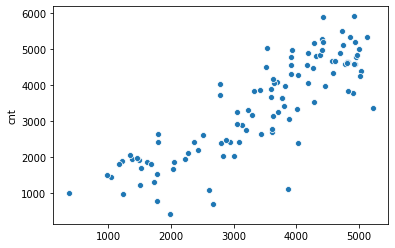

In [525]:
sns.scatterplot(pred_ts, y_test)

#### Decision Trees

In [526]:
from sklearn.tree import DecisionTreeRegressor

In [527]:
lr = DecisionTreeRegressor()
mod2 = lr.fit(X_train,y_train)
pred2_tr = mod2.predict(X_train)

pred2_ts = mod2.predict(X_test)

In [528]:
res2 = res2.append({'model':'Decision Tree + TS',
                  'Train R^2':r2_score(y_train,pred2_tr),'Train MAE':mean_absolute_error(y_train,pred2_tr),
                  'Test R^2':r2_score(y_test,pred2_ts),'Test MAE':mean_absolute_error(y_test,pred2_ts)
                 },ignore_index=True)
                 
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression + TS   0.771323  497.363018  0.717643  564.265949
1      Decision Tree + TS   1.000000    0.000000  0.661939  582.766355

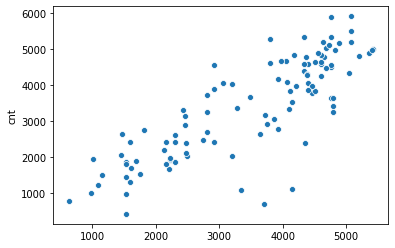

In [529]:
sns.scatterplot(pred2_ts, y_test)

#### Random Forest

In [530]:
from sklearn.ensemble import RandomForestRegressor

In [531]:
lr = RandomForestRegressor()
mod3 = lr.fit(X_train,y_train)
pred3_tr = mod3.predict(X_train)

pred3_ts = mod3.predict(X_test)

In [532]:
res2 = res2.append({'model':'Random Forest + TS',
                  'Train R^2':r2_score(y_train,pred3_tr),'Train MAE':mean_absolute_error(y_train,pred3_tr),
                  'Test R^2':r2_score(y_test,pred3_ts),'Test MAE':mean_absolute_error(y_test,pred3_ts)
                 },ignore_index=True)
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression + TS   0.771323  497.363018  0.717643  564.265949
1      Decision Tree + TS   1.000000    0.000000  0.661939  582.766355
2      Random Forest + TS   0.977942  143.846492  0.775429  453.348972

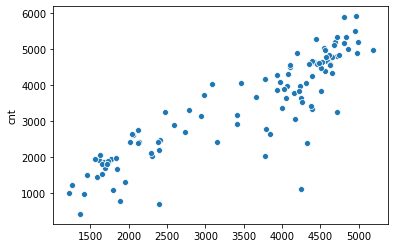

In [533]:
sns.scatterplot(pred3_ts, y_test)

#### AdaBoost

In [534]:
from sklearn.ensemble import AdaBoostRegressor

In [535]:
lr = AdaBoostRegressor()
mod4 = lr.fit(X_train,y_train)
pred4_tr = mod4.predict(X_train)

pred4_ts = mod4.predict(X_test)

In [536]:
res2 = res2.append({'model':'AdaBoost + TS',
                  'Train R^2':r2_score(y_train,pred4_tr),'Train MAE':mean_absolute_error(y_train,pred4_tr),
                  'Test R^2':r2_score(y_test,pred4_ts),'Test MAE':mean_absolute_error(y_test,pred4_ts)
                 },ignore_index=True)
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0  Linear Regression + TS   0.771323  497.363018  0.717643  564.265949
1      Decision Tree + TS   1.000000    0.000000  0.661939  582.766355
2      Random Forest + TS   0.977942  143.846492  0.775429  453.348972
3           AdaBoost + TS   0.909952  338.231963  0.738250  516.115904

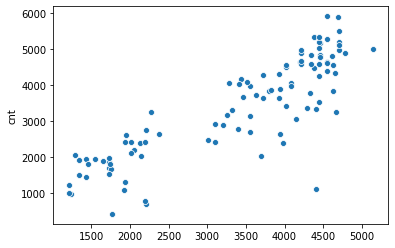

In [537]:
sns.scatterplot(pred4_ts, y_test)

#### Gradient Boosting

In [538]:
from sklearn.ensemble import GradientBoostingRegressor

In [539]:
lr = GradientBoostingRegressor()
mod5 = lr.fit(X_train,y_train)
pred5_tr = mod5.predict(X_train)

pred5_ts = mod5.predict(X_test)

In [540]:
res2 = res2.append({'model':'Gradient Boosting Machine + TS',
                  'Train R^2':r2_score(y_train,pred5_tr),'Train MAE':mean_absolute_error(y_train,pred5_tr),
                  'Test R^2':r2_score(y_test,pred5_ts),'Test MAE':mean_absolute_error(y_test,pred5_ts)
                 },ignore_index=True)
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0          Linear Regression + TS   0.771323  497.363018  0.717643  564.265949
1              Decision Tree + TS   1.000000    0.000000  0.661939  582.766355
2              Random Forest + TS   0.977942  143.846492  0.775429  453.348972
3                   AdaBoost + TS   0.909952  338.231963  0.738250  516.115904
4  Gradient Boosting Machine + TS   0.981842  137.823487  0.769158  458.470372

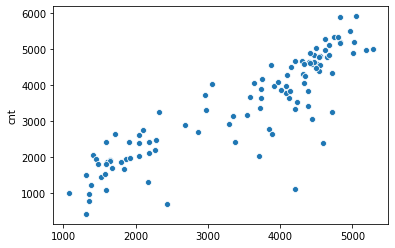

In [541]:
sns.scatterplot(pred5_ts, y_test)

In [542]:
res2

model  Train R^2   Train MAE  Test R^2    Test MAE
0          Linear Regression + TS   0.771323  497.363018  0.717643  564.265949
1              Decision Tree + TS   1.000000    0.000000  0.661939  582.766355
2              Random Forest + TS   0.977942  143.846492  0.775429  453.348972
3                   AdaBoost + TS   0.909952  338.231963  0.738250  516.115904
4  Gradient Boosting Machine + TS   0.981842  137.823487  0.769158  458.470372

### Comparative results


Baseline:
<code>    
	model	                        Train R^2	Train MAE	Test R^2	Test MAE
0	Linear Regression - Baseline	 0.248241	2.123676	0.247761	2.124228
1	Decision Tree	                0.745974	0.935871	0.393154	1.814220
2	Random Forest	                0.725051	1.139726	0.518989	1.634894
3	AdaBoost	                     0.250344	2.166626	0.249208	2.166017
4	Gradient Boosting Machine	    0.380832	1.942226	0.378466	1.943867
</code>  

Enriched with TS data
<code>

model	                            Train R^2	Train MAE	Test R^2	Test MAE
0	Linear Regression + TS	        0.971494	0.3995902	0.971424	0.399379
1	Decision Tree + TS	            1.000000	2.752e-08	0.939100	0.597178
2	Random Forest + TS	            0.995933	0.1503205	0.970909	0.403795
3	AdaBoost + TS	                 0.946707    0.5796741	0.946551	0.579327
4	Gradient Boosting Machine + TS	0.971266	0.4013023	0.971082	0.401719
</code>


### Occam's (Ockham's) razor Principle or Law of Parsimony

Is a is the problem-solving principle taken from philosophy that states that: "Entities should not be multiplied unnecessarily" or in layman's terms, the simplest explanation is usually the best one. In other words, keep it as simple as possible!